In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False
%matplotlib notebook
%matplotlib inline

In [2]:
colunas = ['graudeinstrução', 'idade', 'sexo', 'tipomovimentação', 'salário', 'raçacor', 'seção']
##*ARQUIVO DE DADOS DE MOVIMENTAÇÃO 2020* 
movimento2020 = {
    'janeiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202001.txt', delimiter=';', usecols=colunas),
    'fevereiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202002.txt', delimiter=';', usecols=colunas),
    'marco':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202003.txt', delimiter=';', usecols=colunas),
    'abril':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202004.txt', delimiter=';', usecols=colunas),
    'maio':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202005.txt', delimiter=';', usecols=colunas),
    'junho':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202006.txt', delimiter=';', usecols=colunas),
    'julho':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202007.txt', delimiter=';', usecols=colunas),
    'agosto':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202008.txt', delimiter=';', usecols=colunas),
    'setembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202009.txt', delimiter=';', usecols=colunas),
    'outubro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202010.txt', delimiter=';', usecols=colunas),
    'novembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202011.txt', delimiter=';', usecols=colunas),
    'dezembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202012.txt', delimiter=';', usecols=colunas)
}

##*ARQUIVO DE DADOS DE MOVIMENTAÇÃO 2021* 
movimento2021 = {
    'janeiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202101.txt', delimiter=';', usecols=colunas),
    'fevereiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202102.txt', delimiter=';', usecols=colunas),
    'marco':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202103.txt', delimiter=';', usecols=colunas),
    'abril': pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202104.txt', delimiter=';', usecols=colunas)
}

In [3]:
##*ARQUIVO DE CONTAS NACIONAIS*
colunas_consumo = ['Trimestre','Agropecuária - total','Indústria - total','Serviços - total','Impostos líquidos sobre produtos','Despesa de consumo das famílias','Despesa de consumo da administração pública']
contasNacionais = pd.read_excel(r'./doc/bases_de_dados/contas_nacionais/Tabela 1846.xlsx', 'Tabela',usecols=colunas_consumo)

In [4]:
#Variáveis com códigos/informações que serão utilizadas durante o projeto
meses_grafico2020 = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
meses_grafico2021 = ['Janeiro','Fevereiro','Março','Abril']
cod_admitidos = [10,20,25,35,70]
cod_demitidos = [31,32,33,40,43,45,50,60,80,90,98]
sec_antigas = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','Z']
sec_novas = ["Agricultura, Pecuária, Produção Florestal, Pesca e Aquicultura","Indústrias Extrativas","Indústrias de Transformação","Eletricidade e Gás","Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação","Construção","Comércio, Reparação de Veículos Automotores e Motocicletas","Transporte, Armazenagem e Correio","Alojamento e Alimentação","Informação e Comunicação","Atividades Financeiras, de Seguros e Serviços Relacionados","Atividades Imobiliárias","Atividades Profissionais, Científicas e Técnicas","Atividades Administrativas e Serviços Complementares","Administração Pública, Defesa e Seguridade Social","Educação","Saúde Humana e Serviços Sociais","Artes, Cultura, Esporte e Recreação","Outras Atividades de Serviços","Serviços Domésticos","Organismos Internacionais e Outras Instituições Extraterritoriais","Não identificado"]

In [5]:
#Função para saber se a pessoa foi demitida ou contratada
def movimento(cod):
    if cod in cod_admitidos:
        return 'admitido'
    elif cod in cod_demitidos:
        return 'demitido'
    else: 
        return False

In [6]:
#Classes sociais de acordo com o IBGE
#https://www.todamateria.com.br/classe-social/
def classes_sociais(salario):
    salario_minimo = 1100
    if(salario>(salario_minimo*20)):
        return 'A'
    elif((salario>(salario_minimo*10))and(salario<=(salario_minimo*20))):
        return 'B'
    elif((salario>(salario_minimo*4))and(salario<=(salario_minimo*10))):
        return 'C'
    elif((salario>(salario_minimo*2))and(salario<=(salario_minimo*4))):
        return 'D'
    elif(salario<=(salario_minimo*2)):
        return 'E'

In [7]:
#Numeração da raça de acordo com o novo Layout dos Microdados do CAGED
def Raca(numRaca):
    if(numRaca == 1):
        return 'Branca'
    elif(numRaca == 2):
        return 'Preta'
    elif(numRaca == 3):
        return 'Parda'
    elif(numRaca == 4):
        return 'Amarela'
    elif(numRaca == 5):
        return 'Indígena'
    elif(numRaca == 6):
        return 'Não informada'
    elif(numRaca == 9):
        return 'Não identificada'

In [8]:
def contagemEmpregoSexo(dic):
    mes = {'mulheres':{'admissoes':0,'demissoes':0,'nao_identificado':0},'homens':{'admissoes':0,'demissoes':0,'nao_identificado':0}}
    for k,v in dic.items():
        if(movimento(k[0])=='admitido'):
            if(k[1]==1):
                mes['homens']['admissoes']+=v 
            if(k[1]==3):
                mes['mulheres']['admissoes']+=v
        elif(movimento(k[0])=='demitido'):
            if(k[1]==1):
                mes['homens']['demissoes']+=v
            if(k[1]==3):
                mes['mulheres']['demissoes']+=v
        else:
            if(k[1]==1):
                mes['homens']['nao_identificado']+=v
            if(k[1]==3):
                mes['mulheres']['nao_identificado']+=v
    return mes

def contagemEmpregoClasseSocial(lista): 
    demitidos = {'A':0,'B':0,'C':0,'D':0,'E':0}
    admitidos = {'A':0,'B':0,'C':0,'D':0,'E':0}
    nao_identificado = {'A':0,'B':0,'C':0,'D':0,'E':0}
    for l in lista:
        if movimento(l['tipomovimentação'])=='admitido':
            if(classes_sociais(l['salário'])=='A'):
                admitidos['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                admitidos['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                admitidos['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                admitidos['D']+=1
            else:
                admitidos['E']+=1
        elif movimento(l['tipomovimentação'])=='demitido':
            if(classes_sociais(l['salário'])=='A'):
                demitidos['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                demitidos['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                demitidos['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                demitidos['D']+=1
            else:
                demitidos['E']+=1
        else:
            if(classes_sociais(l['salário'])=='A'):
                nao_identificado['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                nao_identificado['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                nao_identificado['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                nao_identificado['D']+=1
            else:
                nao_identificado['E']+=1
        
    return {
        'admitidos':admitidos,
        'demitidos':demitidos,
        'nao_identificado':nao_identificado
    }

In [9]:
# pessoas admitidas/demitidas por faixa etária
# fonte para dividir a faixa etária: https://educador.brasilescola.uol.com.br/estrategias-ensino/faixa-etaria-populacao-brasileira.htm
## jovens: idade <= 19
## adultos: idade >= 20 e <= 59
## idosos: idade >= 60

def contagemPorFaixaEtaria (lista):
    demitidos = {'Jovens':0,'Adultos':0,'Idosos':0}
    admitidos = {'Jovens':0,'Adultos':0,'Idosos':0}
    
    for l in lista:
        
        idadeIndividuo = int(l['idade'])
        movimentacao = movimento(l['tipomovimentação'])
        
        if idadeIndividuo <= 19:
            if movimentacao =='admitido':
                admitidos['Jovens'] += 1
            elif movimentacao == 'demitido':
                demitidos['Jovens'] += 1
                
        elif idadeIndividuo >= 20 and idadeIndividuo <= 59:
            if movimentacao == 'admitido':
                admitidos['Adultos'] += 1
            elif movimentacao == 'demitido':
                demitidos['Adultos'] += 1
                
        elif idadeIndividuo >= 60:
            if movimentacao == 'admitido':
                admitidos['Idosos'] += 1
            elif movimentacao == 'demitido':
                demitidos['Idosos'] += 1
                
    return {
        'admitidos': admitidos,
        'demitidos': demitidos
    }

In [10]:
#função para renderizar o gráfico de emprego de acordo com gênero
def plotGraficoEmpregoGenero(mulheres,homens,label_homens,label_mulheres,xlabel,ylabel,title,tamanhox,tamanhoy,meses):
    barWidth = 0.25
    plt.figure(figsize=(tamanhox,tamanhoy))
    r1 = np.arange(len(mulheres))
    r2 = [x + barWidth for x in r1]
    plt.bar(r1,mulheres,color='#6A5ACD',width=barWidth,label=label_mulheres)
    plt.bar(r2,homens,color='#649AED',width=barWidth,label=label_homens)
    plt.xlabel(xlabel)
    plt.xticks([r + barWidth for r in range(len(mulheres))],meses)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [11]:
##Verificar o dataframe do CAGED Movimentação 

#Admissões e demissões por gênero 2020
empregoPorGenero2020 = {}
for mes in movimento2020:
    empregoPorGenero2020[mes]=contagemEmpregoSexo(movimento2020[mes].groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())

#Admissões e demissões por gênero 2021 
empregoPorGenero2021 = {}
for mes in movimento2021:
    empregoPorGenero2021[mes]=contagemEmpregoSexo(movimento2021[mes].groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())

In [12]:
#função para renderizar o gráfico de emprego de acordo com a classe social
def plotGraficoEmpregoClasseSocial(lista_A,lista_B,lista_C,lista_D,lista_E,ylabel,xlabel,title,tamanhox,tamanhoy,meses):

    fig, ax = plt.subplots()

    ax.plot(meses, lista_A, lw = 2, alpha = 1,label='A')
    ax.plot(meses, lista_B, lw = 2, alpha = 1,label='B')
    ax.plot(meses, lista_C, lw = 2, alpha = 1,label='C')
    ax.plot(meses, lista_D, lw = 2, alpha = 1,label='D')
    ax.plot(meses, lista_E, lw = 2, alpha = 1,label='E')
    fig.set_size_inches(tamanhox, tamanhoy)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

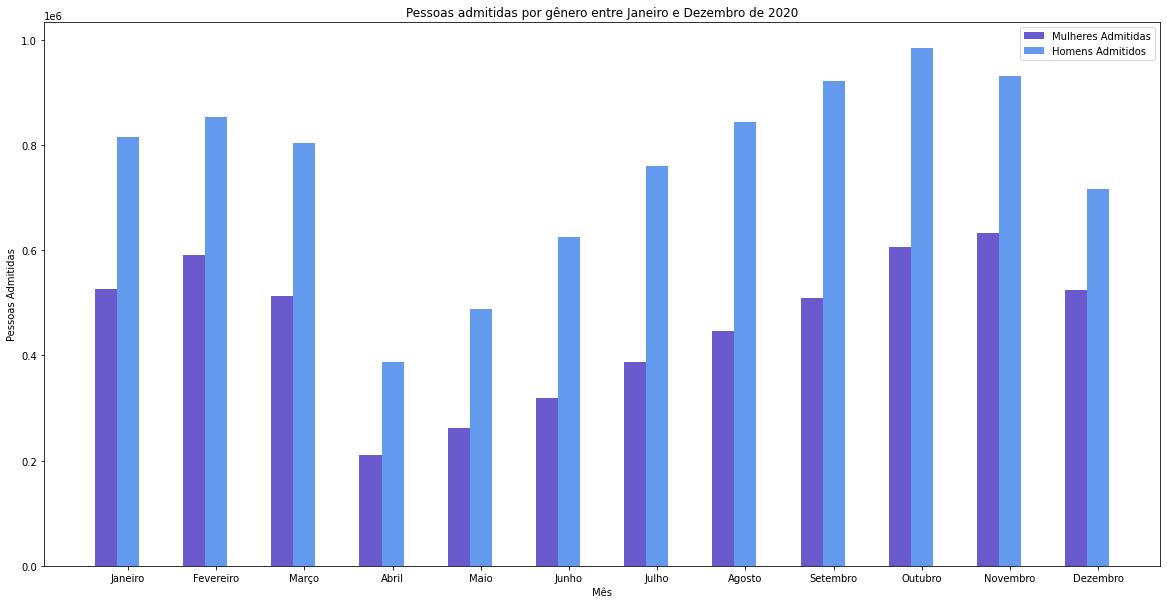

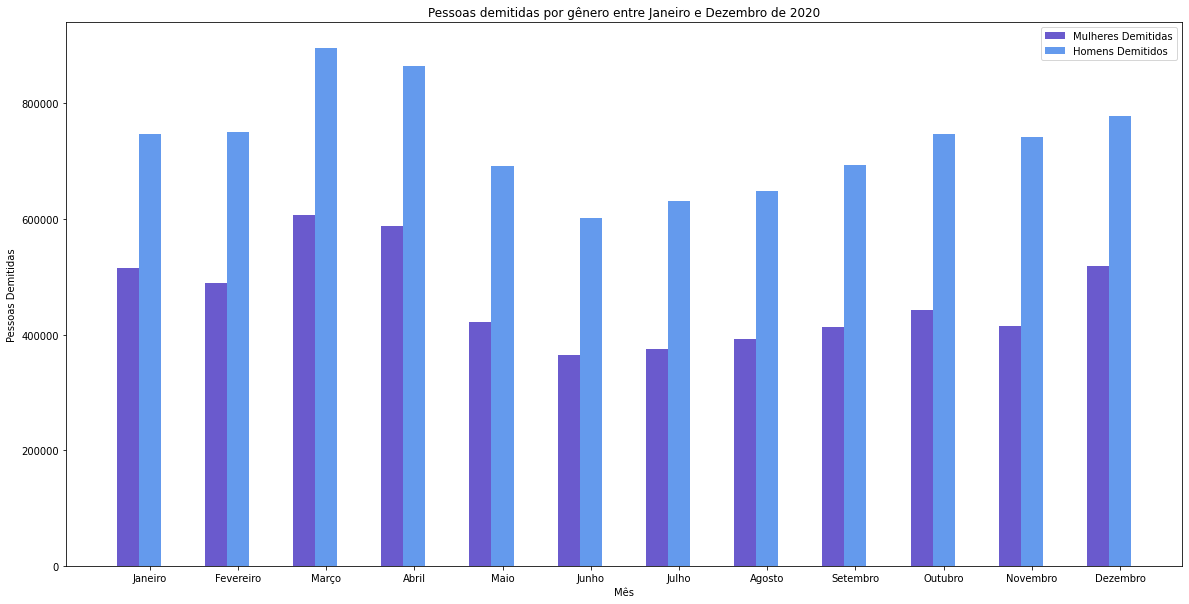

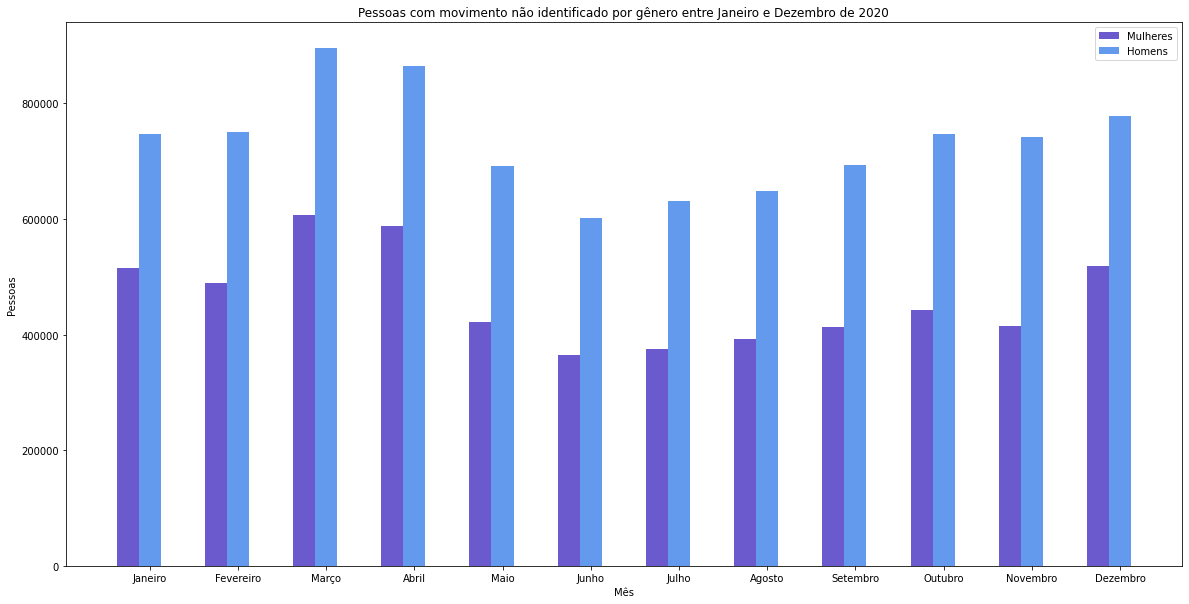

In [13]:
#Gŕaficos de Admissões e demissões por gênero 2020 
mulheres_admitidos2020 = []
mulheres_demitidos2020 = []
homens_admitidos2020 = []
homens_demitidos2020 = []
mulheres_nao_identificado2020 = []
homens_nao_identificado2020 = []

for mes,dic in empregoPorGenero2020.items():
    mulheres_admitidos2020.append(dic['mulheres']['admissoes'])
    homens_admitidos2020.append(dic['homens']['admissoes'])
    mulheres_demitidos2020.append(dic['mulheres']['demissoes'])
    homens_demitidos2020.append(dic['homens']['demissoes'])
    mulheres_nao_identificado2020.append(dic['mulheres']['nao_identificado'])
    homens_nao_identificado2020.append(dic['homens']['nao_identificado'])

plotGraficoEmpregoGenero(mulheres_admitidos2020,homens_admitidos2020,'Homens Admitidos','Mulheres Admitidas','Mês','Pessoas Admitidas','Pessoas admitidas por gênero entre Janeiro e Dezembro de 2020',20,10,meses_grafico2020)
plotGraficoEmpregoGenero(mulheres_demitidos2020,homens_demitidos2020,'Homens Demitidos','Mulheres Demitidas','Mês','Pessoas Demitidas','Pessoas demitidas por gênero entre Janeiro e Dezembro de 2020',20,10,meses_grafico2020)
plotGraficoEmpregoGenero(mulheres_demitidos2020,homens_demitidos2020,'Homens','Mulheres','Mês','Pessoas','Pessoas com movimento não identificado por gênero entre Janeiro e Dezembro de 2020',20,10,meses_grafico2020)

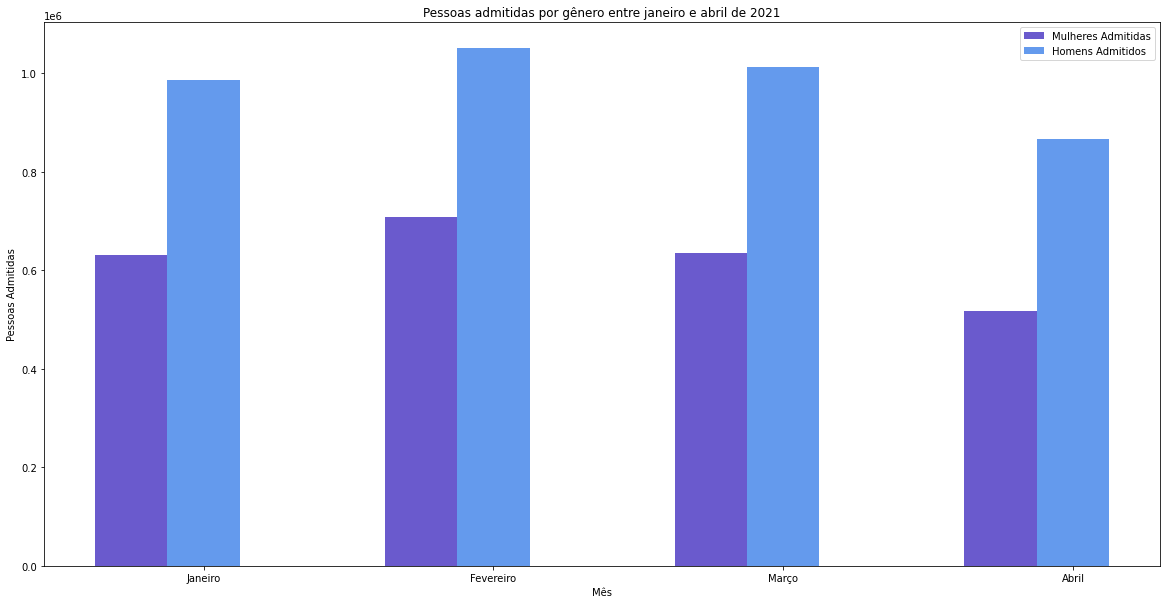

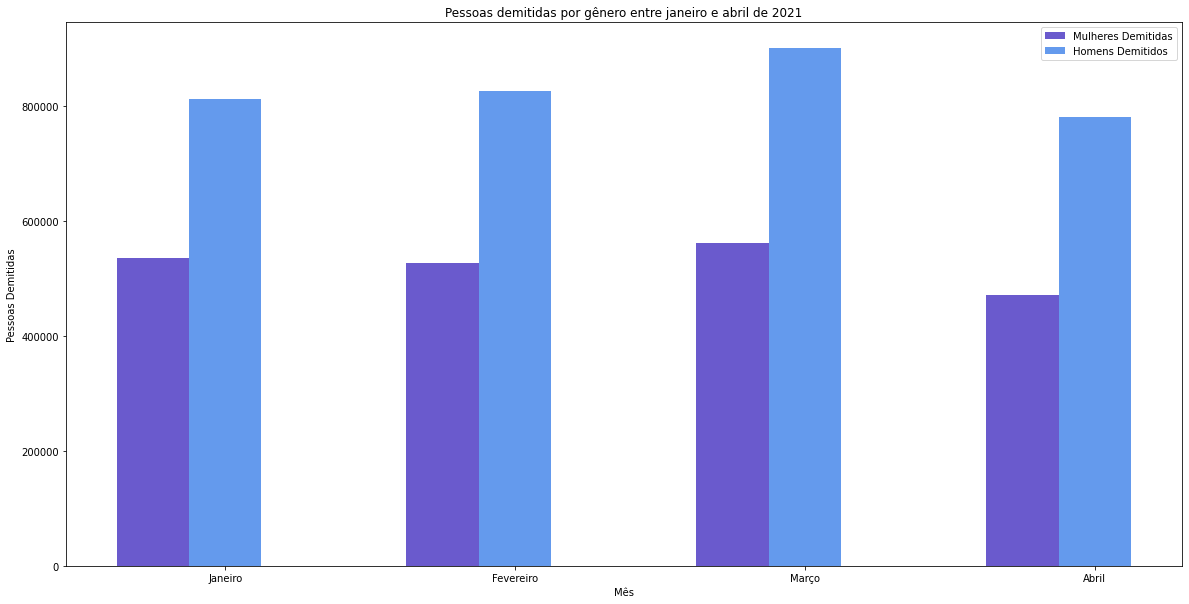

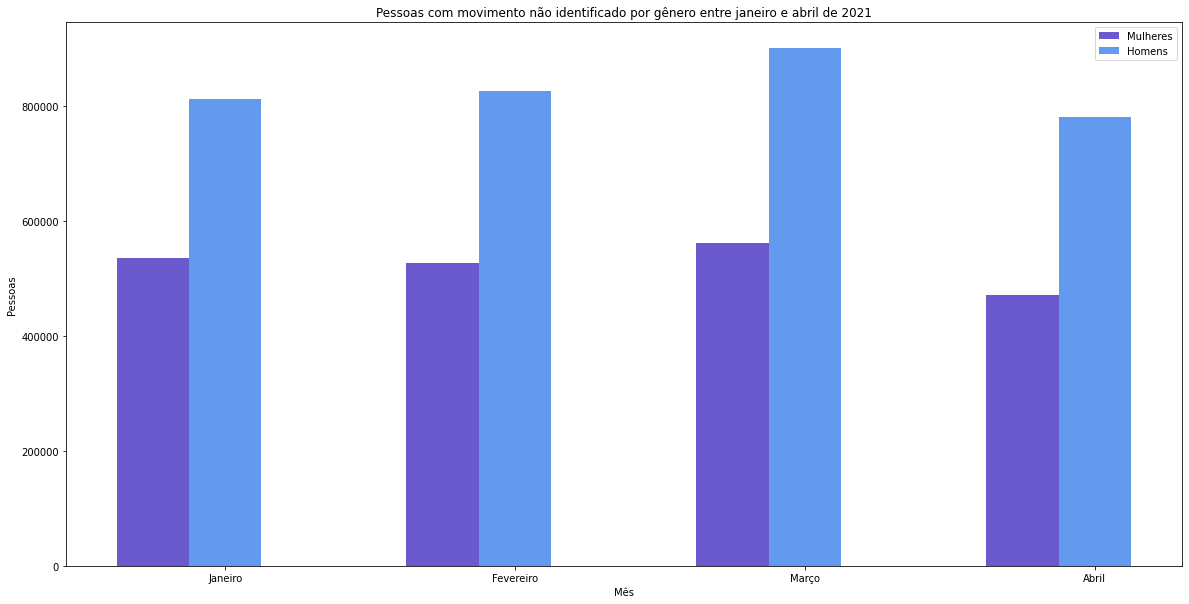

In [14]:
#Gŕaficos de Admissões e demissões por gênero 2021
mulheres_admitidos2021 = []
mulheres_demitidos2021 = []
homens_admitidos2021 = []
homens_demitidos2021 = []
mulheres_nao_identificado2021 = []
homens_nao_identificado2021 = []

for mes,dic in empregoPorGenero2021.items():
    mulheres_admitidos2021.append(dic['mulheres']['admissoes'])
    homens_admitidos2021.append(dic['homens']['admissoes'])
    mulheres_demitidos2021.append(dic['mulheres']['demissoes'])
    homens_demitidos2021.append(dic['homens']['demissoes'])
    mulheres_nao_identificado2021.append(dic['mulheres']['nao_identificado'])
    homens_nao_identificado2021.append(dic['homens']['nao_identificado'])

plotGraficoEmpregoGenero(mulheres_admitidos2021,homens_admitidos2021,'Homens Admitidos','Mulheres Admitidas','Mês','Pessoas Admitidas','Pessoas admitidas por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)
plotGraficoEmpregoGenero(mulheres_demitidos2021,homens_demitidos2021,'Homens Demitidos','Mulheres Demitidas','Mês','Pessoas Demitidas','Pessoas demitidas por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)
plotGraficoEmpregoGenero(mulheres_demitidos2021,homens_demitidos2021,'Homens','Mulheres','Mês','Pessoas','Pessoas com movimento não identificado por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)

In [15]:
#função para renderizar o gráfico de emprego de acordo com a classe social
def plotGraficoEmpregoFaixaEtaria(lista_Jovens,lista_Adultos,lista_Idosos,ylabel,xlabel,title,tamanhox,tamanhoy,meses):

    fig, ax = plt.subplots()

    ax.plot(meses, lista_Jovens, lw = 2, alpha = 1,label='Jovens')
    ax.plot(meses, lista_Adultos, lw = 2, alpha = 1,label='Adultos')
    ax.plot(meses, lista_Idosos, lw = 2, alpha = 1,label='Idosos')
    
    fig.set_size_inches(tamanhox, tamanhoy)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

In [16]:
#Admissões e demissões por classe social 2020 
empregoPorClasseSocial2020 = {}
for mes in movimento2020:
    empregoPorClasseSocial2020[mes]=contagemEmpregoClasseSocial(movimento2020[mes][['tipomovimentação','salário']].to_dict('records'))

#Admissões e demissões por classe social 2021
empregoPorClasseSocial2021 = {} 
for mes in movimento2021:
    empregoPorClasseSocial2021[mes]=contagemEmpregoClasseSocial(movimento2021[mes][['tipomovimentação','salário']].to_dict('records'))

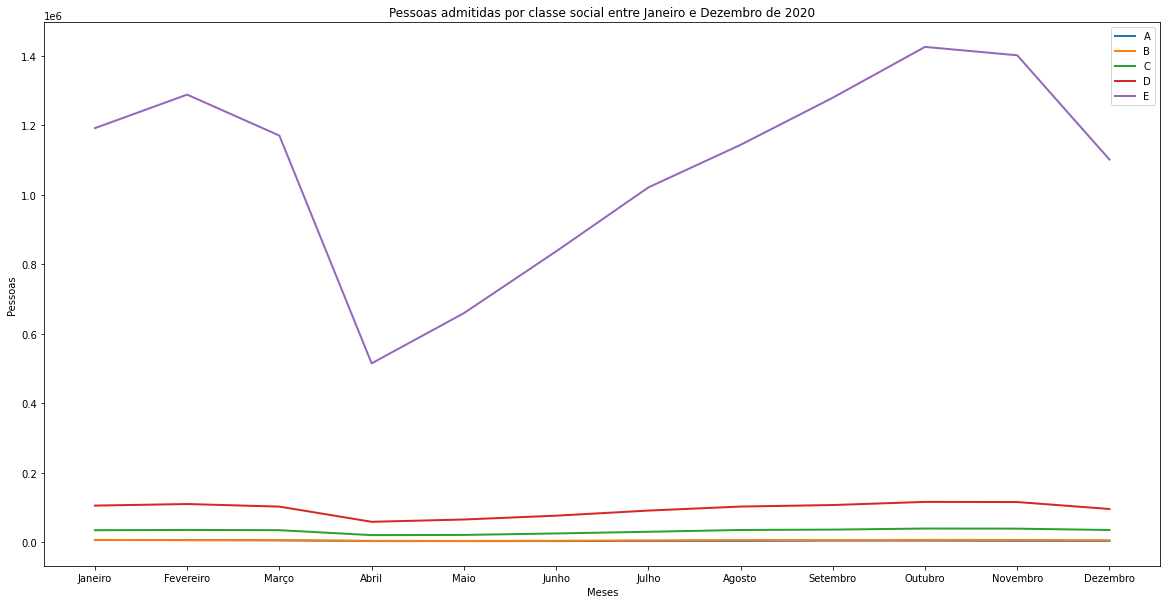

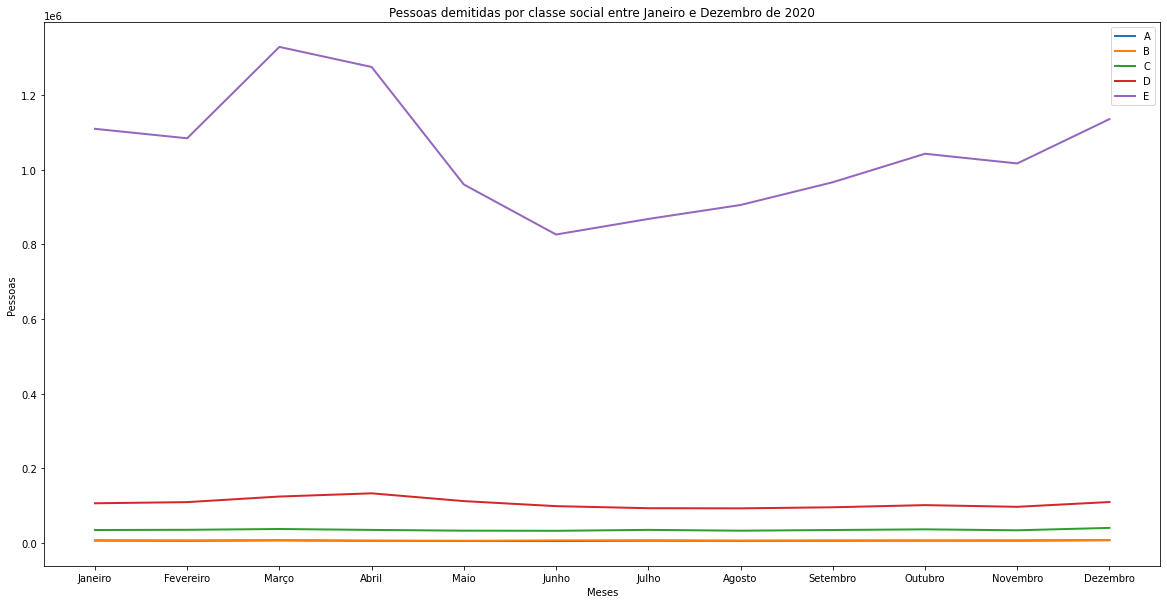

In [17]:
lista_A_admitidos2020 = []
lista_A_demitidos2020 = []
lista_B_admitidos2020 = []
lista_B_demitidos2020 = []
lista_C_admitidos2020 = []
lista_C_demitidos2020 = []
lista_D_admitidos2020 = []
lista_D_demitidos2020 = []
lista_E_admitidos2020 = []
lista_E_demitidos2020 = []
for mes,dic in empregoPorClasseSocial2020.items():
    lista_A_admitidos2020.append(dic['admitidos']['A'])
    lista_A_demitidos2020.append(dic['demitidos']['A'])
    lista_B_admitidos2020.append(dic['admitidos']['B'])
    lista_B_demitidos2020.append(dic['demitidos']['B'])
    lista_C_admitidos2020.append(dic['admitidos']['C'])
    lista_C_demitidos2020.append(dic['demitidos']['C'])
    lista_D_admitidos2020.append(dic['admitidos']['D'])
    lista_D_demitidos2020.append(dic['demitidos']['D'])
    lista_E_admitidos2020.append(dic['admitidos']['E'])
    lista_E_demitidos2020.append(dic['demitidos']['E'])

#gráfico das pessoas admitidas por classe social entre janeiro e dezembro de 2020
plotGraficoEmpregoClasseSocial(
    lista_A_admitidos2020,
    lista_B_admitidos2020,
    lista_C_admitidos2020,
    lista_D_admitidos2020,
    lista_E_admitidos2020,
    'Pessoas','Meses','Pessoas admitidas por classe social entre Janeiro e Dezembro de 2020',20,10,meses_grafico2020)

#gráfico das pessoas demitidas por classe social entre janeiro e dezembro de 2020
plotGraficoEmpregoClasseSocial(
    lista_A_demitidos2020,
    lista_B_demitidos2020,
    lista_C_demitidos2020,
    lista_D_demitidos2020,
    lista_E_demitidos2020,
    'Pessoas','Meses','Pessoas demitidas por classe social entre Janeiro e Dezembro de 2020',20,10,meses_grafico2020)

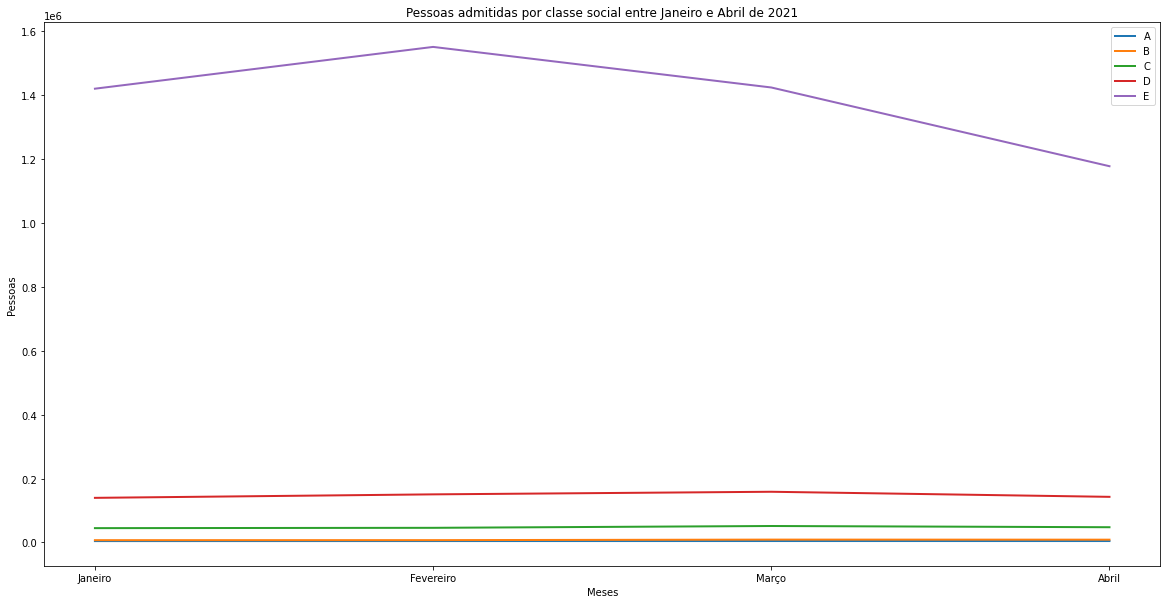

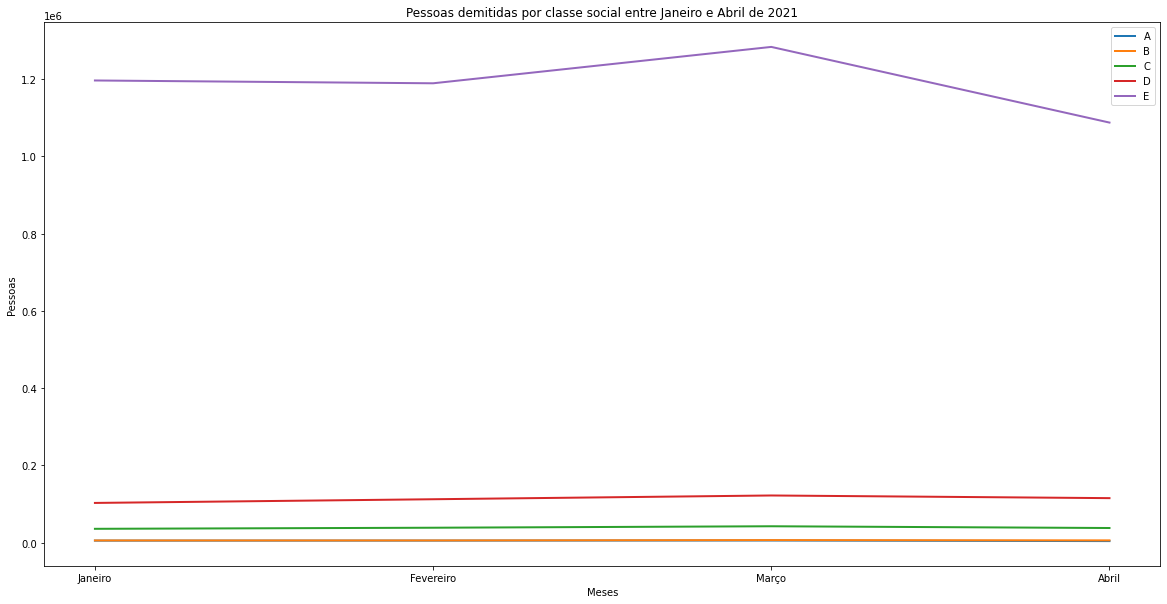

In [18]:
lista_A_admitidos2021 = []
lista_A_demitidos2021 = []
lista_B_admitidos2021 = []
lista_B_demitidos2021 = []
lista_C_admitidos2021 = []
lista_C_demitidos2021 = []
lista_D_admitidos2021 = []
lista_D_demitidos2021 = []
lista_E_admitidos2021 = []
lista_E_demitidos2021 = []
for mes,dic in empregoPorClasseSocial2021.items():
    lista_A_admitidos2021.append(dic['admitidos']['A'])
    lista_A_demitidos2021.append(dic['demitidos']['A'])
    lista_B_admitidos2021.append(dic['admitidos']['B'])
    lista_B_demitidos2021.append(dic['demitidos']['B'])
    lista_C_admitidos2021.append(dic['admitidos']['C'])
    lista_C_demitidos2021.append(dic['demitidos']['C'])
    lista_D_admitidos2021.append(dic['admitidos']['D'])
    lista_D_demitidos2021.append(dic['demitidos']['D'])
    lista_E_admitidos2021.append(dic['admitidos']['E'])
    lista_E_demitidos2021.append(dic['demitidos']['E'])
    
#gráfico das pessoas admitidas por classe social entre janeiro e abril de 2021
plotGraficoEmpregoClasseSocial(
    lista_A_admitidos2021,
    lista_B_admitidos2021,
    lista_C_admitidos2021,
    lista_D_admitidos2021,
    lista_E_admitidos2021,
    'Pessoas','Meses','Pessoas admitidas por classe social entre Janeiro e Abril de 2021',20,10,meses_grafico2021)

#gráfico das pessoas demitidas por classe social entre janeiro e abril de 2021
plotGraficoEmpregoClasseSocial(
    lista_A_demitidos2021,
    lista_B_demitidos2021,
    lista_C_demitidos2021,
    lista_D_demitidos2021,
    lista_E_demitidos2021,
    'Pessoas','Meses','Pessoas demitidas por classe social entre Janeiro e Abril de 2021',20,10,meses_grafico2021)

In [19]:
#Admissões e demissões por faixa etária 2020 
empregoPorFaixaEtaria2020 = {}
for mes in movimento2020:
    empregoPorFaixaEtaria2020[mes] = contagemPorFaixaEtaria(movimento2020[mes][['tipomovimentação','idade']].dropna().to_dict('records'))
    
# admissões e demissões por faixa etária 2021
empregoPorFaixaEtaria2021 = {}
for mes in movimento2021:
    empregoPorFaixaEtaria2021[mes] = contagemPorFaixaEtaria(movimento2021[mes][['tipomovimentação', 'idade']].dropna().to_dict('records'))

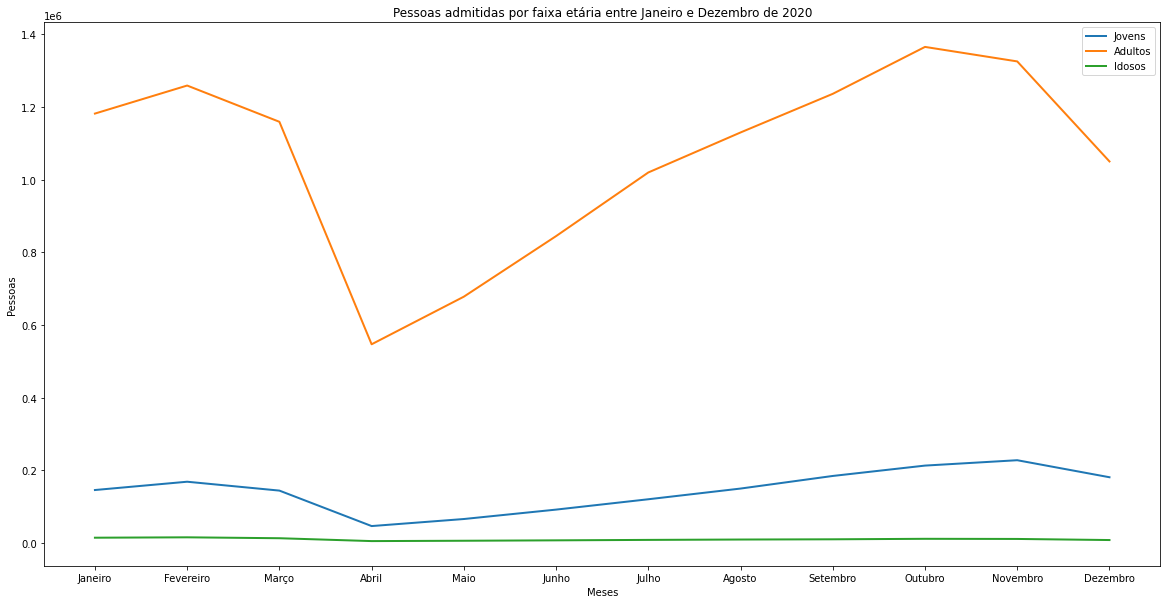

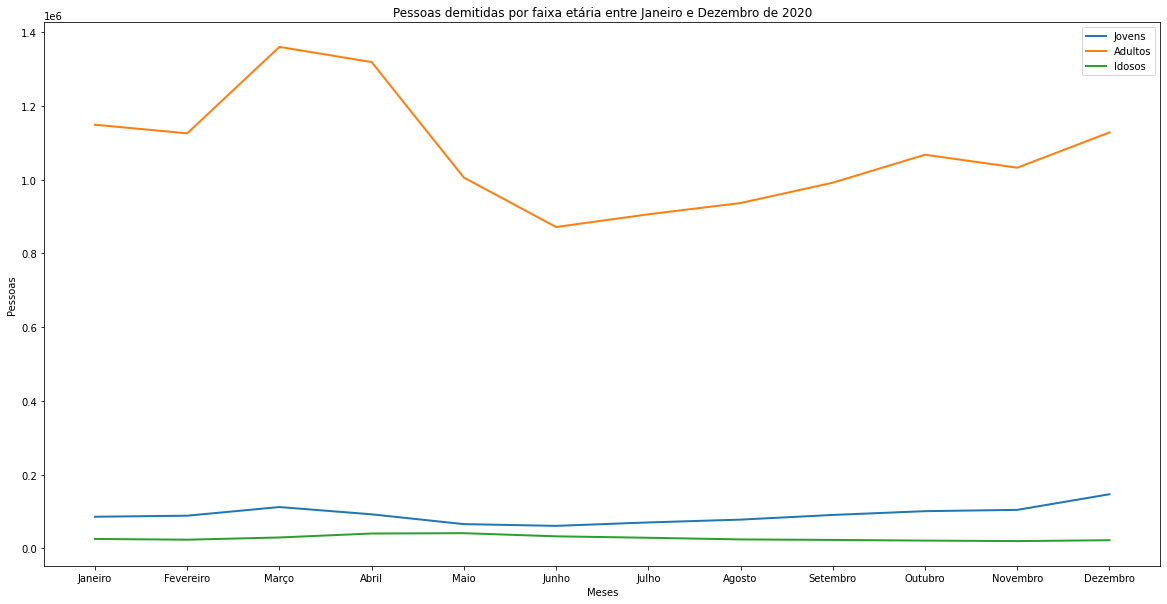

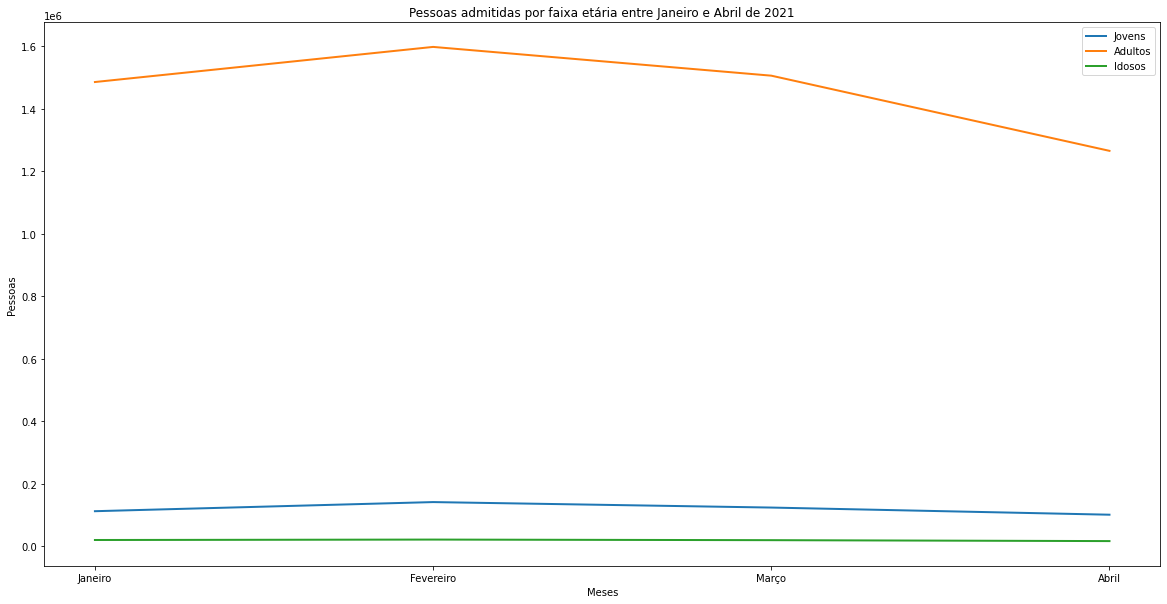

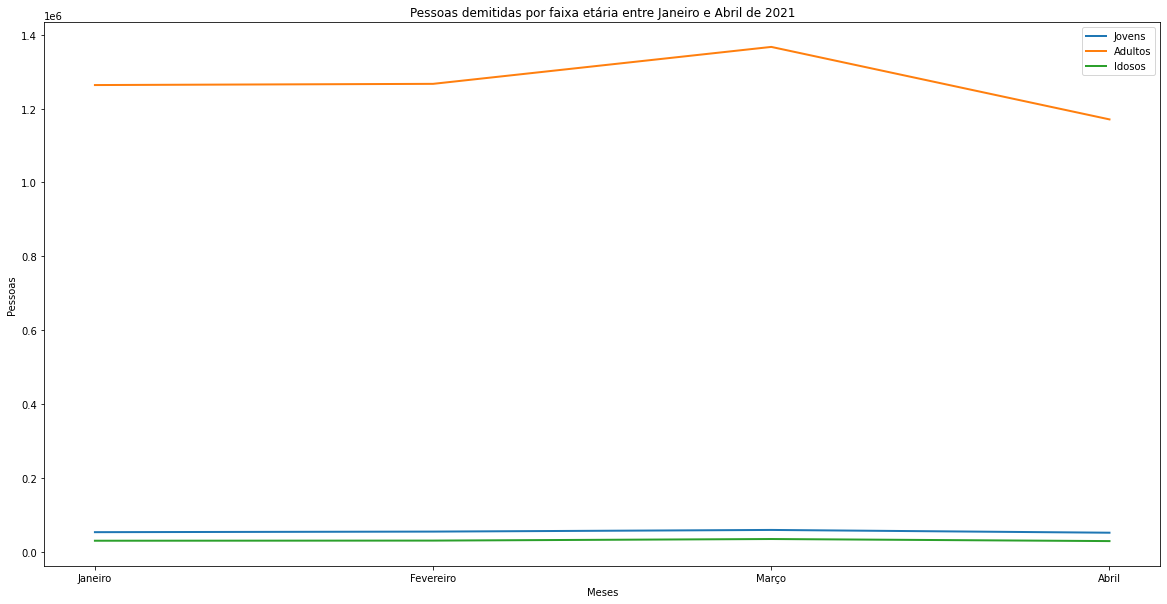

In [20]:
lista_Jovens_admitidos2020 = []
lista_Jovens_demitidos2020 = []
lista_Adultos_admitidos2020 = []
lista_Adultos_demitidos2020 = []
lista_Idosos_admitidos2020 = []
lista_Idosos_demitidos2020 = []

lista_Jovens_admitidos2021 = []
lista_Jovens_demitidos2021 = []
lista_Adultos_admitidos2021 = []
lista_Adultos_demitidos2021 = []
lista_Idosos_admitidos2021 = []
lista_Idosos_demitidos2021 = []

for mes,dic in empregoPorFaixaEtaria2020.items():
    lista_Jovens_admitidos2020.append(dic['admitidos']['Jovens'])
    lista_Jovens_demitidos2020.append(dic['demitidos']['Jovens'])
    lista_Adultos_admitidos2020.append(dic['admitidos']['Adultos'])
    lista_Adultos_demitidos2020.append(dic['demitidos']['Adultos'])
    lista_Idosos_admitidos2020.append(dic['admitidos']['Idosos'])
    lista_Idosos_demitidos2020.append(dic['demitidos']['Idosos'])
    
for mes,dic in empregoPorFaixaEtaria2021.items():
    lista_Jovens_admitidos2021.append(dic['admitidos']['Jovens'])
    lista_Jovens_demitidos2021.append(dic['demitidos']['Jovens'])
    lista_Adultos_admitidos2021.append(dic['admitidos']['Adultos'])
    lista_Adultos_demitidos2021.append(dic['demitidos']['Adultos'])
    lista_Idosos_admitidos2021.append(dic['admitidos']['Idosos'])
    lista_Idosos_demitidos2021.append(dic['demitidos']['Idosos'])

# grafico pessoas admitidos por faixa etaria em 2020
plotGraficoEmpregoFaixaEtaria(lista_Jovens_admitidos2020,lista_Adultos_admitidos2020,lista_Idosos_admitidos2020,'Pessoas','Meses','Pessoas admitidas por faixa etária entre Janeiro e Dezembro de 2020',20,10,meses_grafico2020)

# grafico pessoas admitidos por faixa etaria em 2020
plotGraficoEmpregoFaixaEtaria(lista_Jovens_demitidos2020,lista_Adultos_demitidos2020,lista_Idosos_demitidos2020,'Pessoas','Meses','Pessoas demitidas por faixa etária entre Janeiro e Dezembro de 2020',20,10,meses_grafico2020)

# grafico pessoas admitidos por faixa etaria em 2021
plotGraficoEmpregoFaixaEtaria(lista_Jovens_admitidos2021,lista_Adultos_admitidos2021,lista_Idosos_admitidos2021,'Pessoas','Meses','Pessoas admitidas por faixa etária entre Janeiro e Abril de 2021',20,10,meses_grafico2021)

# grafico pessoas demitidas por faixa etaria em 2021
plotGraficoEmpregoFaixaEtaria(lista_Jovens_demitidos2021,lista_Adultos_demitidos2021,lista_Idosos_demitidos2021,'Pessoas','Meses','Pessoas demitidas por faixa etária entre Janeiro e Abril de 2021',20,10,meses_grafico2021)

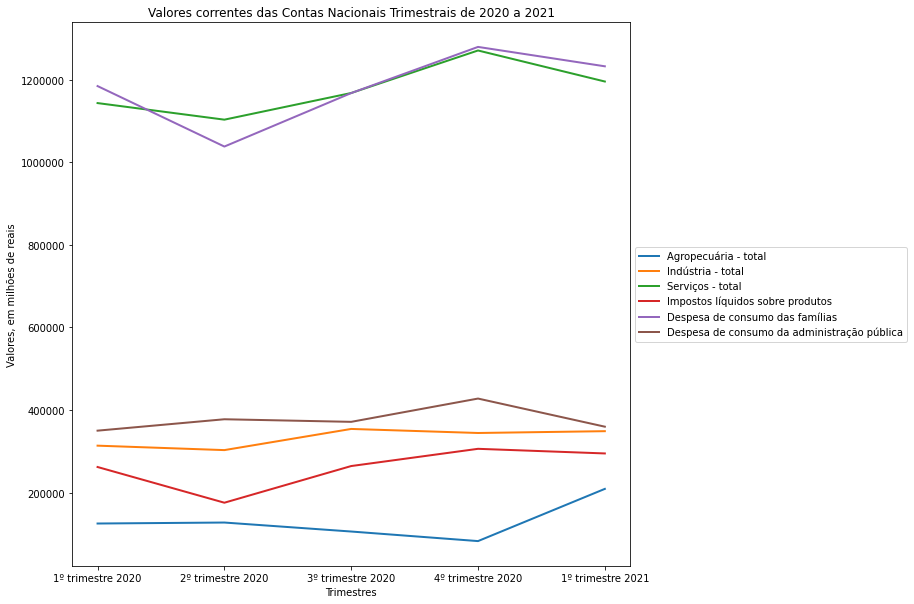

In [21]:
#*Dados consumo*
colunasConsumo = ['Agropecuária - total','Indústria - total','Serviços - total','Impostos líquidos sobre produtos','Despesa de consumo das famílias','Despesa de consumo da administração pública']
consumo = contasNacionais[colunas_consumo].loc[96:100].to_dict('list')

fig, ax = plt.subplots()
plt.rcdefaults()
ax.plot(consumo['Trimestre'], consumo['Agropecuária - total'], lw = 2, alpha = 1,label='Agropecuária - total')
ax.plot(consumo['Trimestre'], consumo['Indústria - total'], lw = 2, alpha = 1,label='Indústria - total')
ax.plot(consumo['Trimestre'], consumo['Serviços - total'], lw = 2, alpha = 1,label='Serviços - total')
ax.plot(consumo['Trimestre'], consumo['Impostos líquidos sobre produtos'], lw = 2, alpha = 1,label='Impostos líquidos sobre produtos')
ax.plot(consumo['Trimestre'], consumo['Despesa de consumo das famílias'], lw = 2, alpha = 1,label='Despesa de consumo das famílias')
ax.plot(consumo['Trimestre'], consumo['Despesa de consumo da administração pública'], lw = 2, alpha = 1,label='Despesa de consumo da administração pública')
fig.set_size_inches(10, 10)
ax.set_title('Valores correntes das Contas Nacionais Trimestrais de 2020 a 2021')
ax.set_xlabel('Trimestres')
ax.set_ylabel('Valores, em milhões de reais')
plt.ticklabel_format(style='plain', axis='y')

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

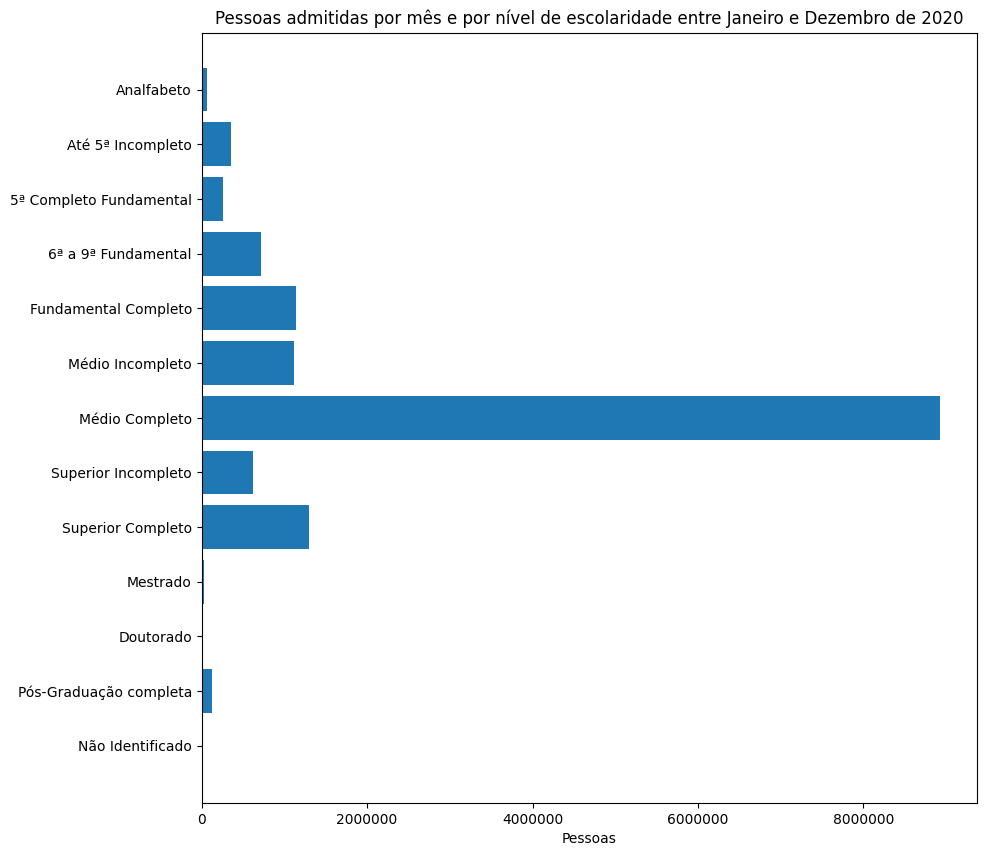

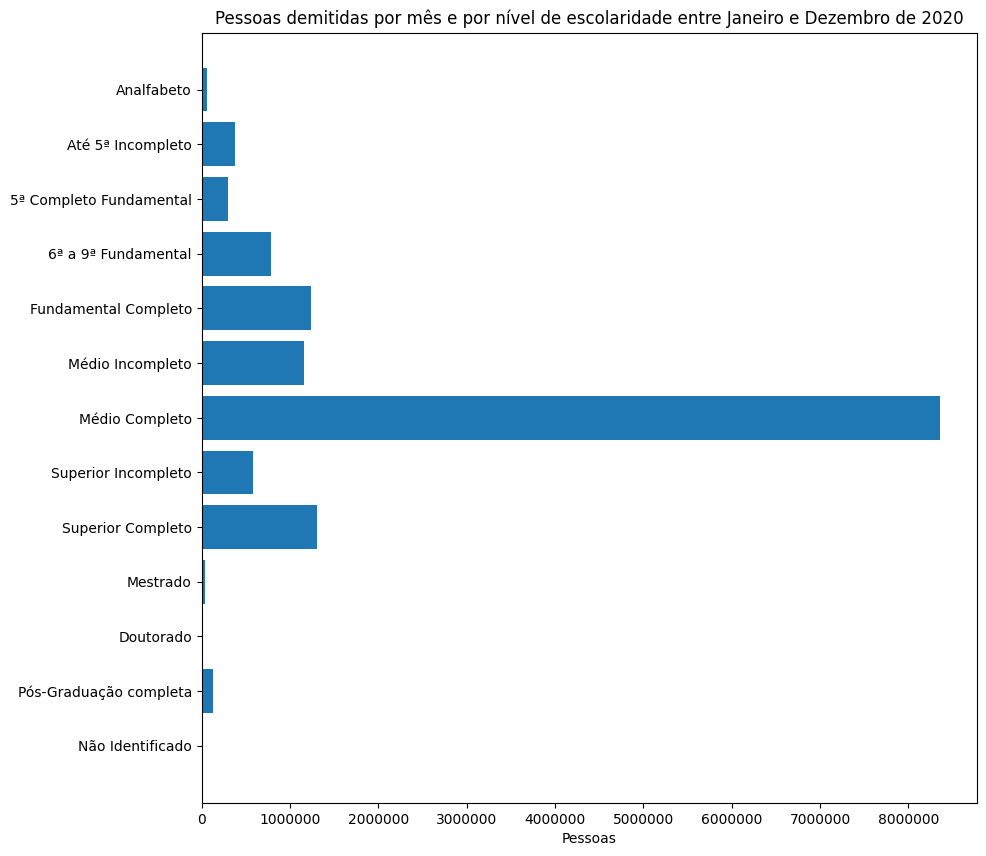

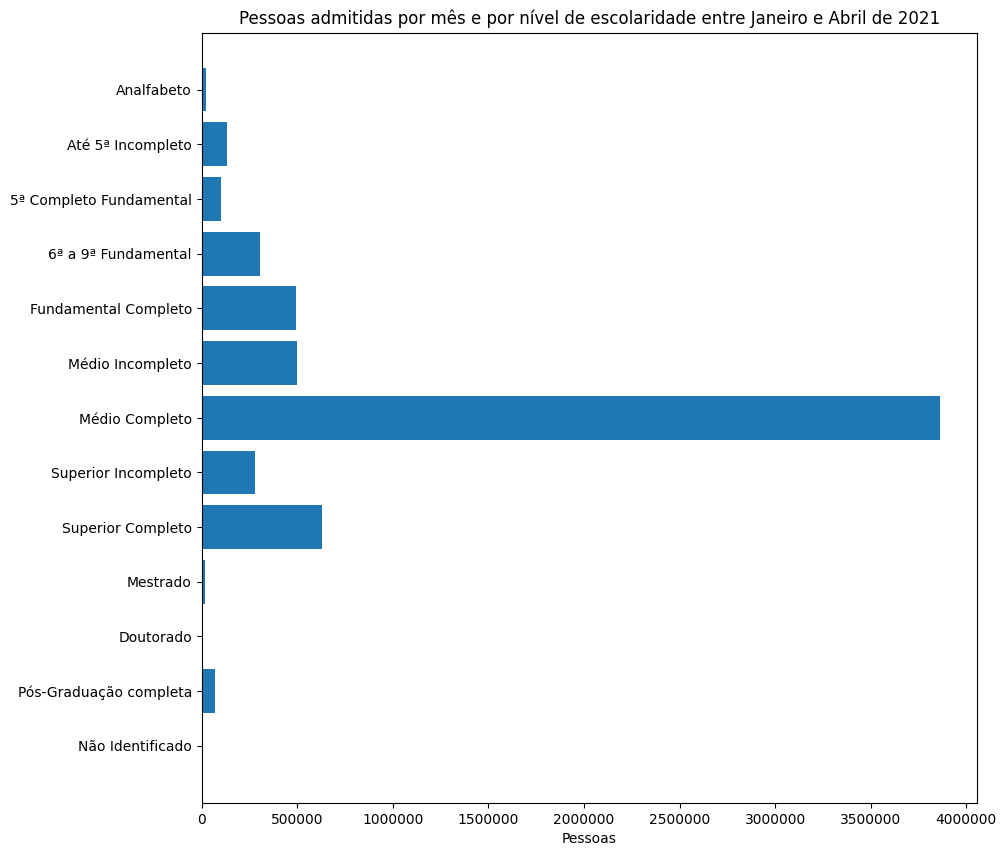

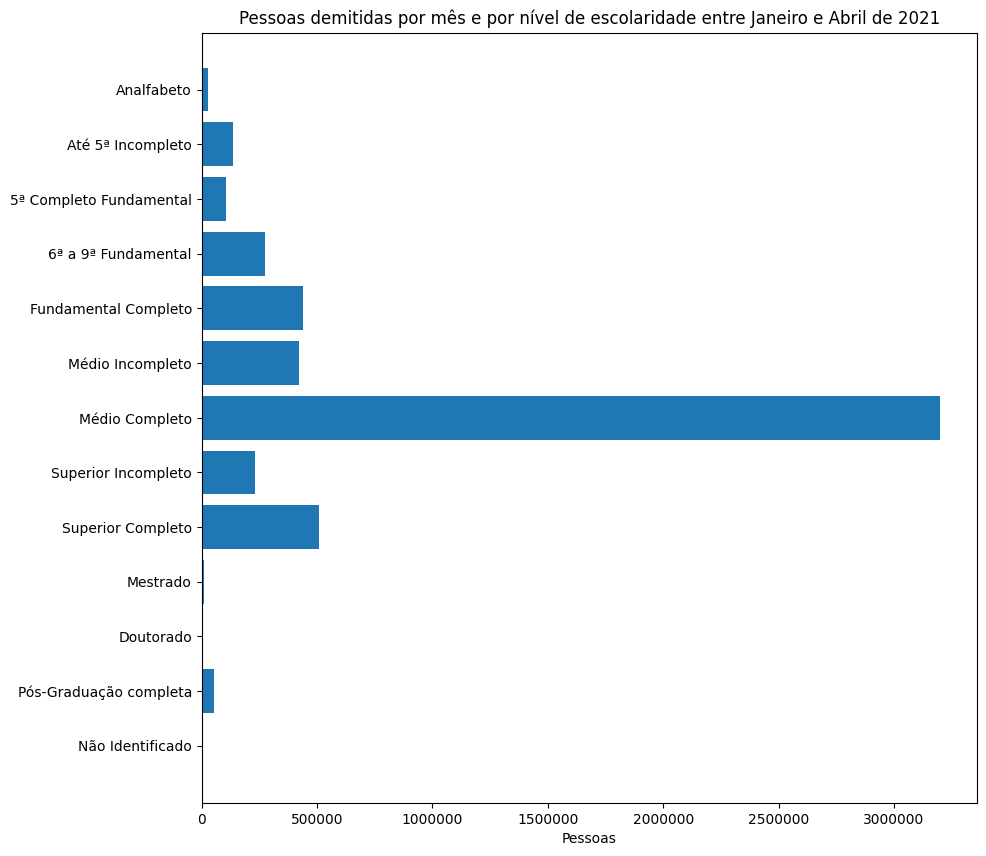

In [22]:
grau_instrucao = {'1': 'Analfabeto','2': 'Até 5ª Incompleto','3': '5ª Completo Fundamental','4': '6ª a 9ª Fundamental','5': 'Fundamental Completo','6': 'Médio Incompleto','7': 'Médio Completo','8': 'Superior Incompleto','9': 'Superior Completo','10': 'Mestrado','11': 'Doutorado','80': 'Pós-Graduação completa','99': 'Não Identificado','13': 'Não Identificado','12': 'Não Identificado'}

def contagemEmpregoPorInstrucao(dic):
    admitidos = {}
    demitidos = {}
    for k,v in dic.items():
        chave = grau_instrucao[str(k[1])]
        if(movimento(k[0])=='admitido'):
            if chave in admitidos:
                admitidos[chave] += v
            else:
                admitidos[chave] = v
        if(movimento(k[0])=='demitido'):
            if chave in demitidos:
                demitidos[chave] += v
            else:
                demitidos[chave] = v
    return {
        'admitidos':admitidos,
        'demitidos':demitidos
    }
    
def plotGraficoEmpregoInstrucao(lista,ylabel,xlabel,title,tamanhox,tamanhoy,meses,tipo):
    
    pessoas = {}
    for k,instrucao in grau_instrucao.items():
        pessoas[instrucao] = 0
    for mes,dic in enumerate(lista):
        for instrucao, qtd_pessoas in dic[tipo].items():
            pessoas[instrucao]+=qtd_pessoas
            
    barWidth = 0.25
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(pessoas.keys()))
    grafico = []
    for instrucao,qtd_pessoas in pessoas.items():
        grafico.append(qtd_pessoas)
    ax.barh(y_pos,grafico, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pessoas.keys())
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()
    
empregoPorNivelInstrucao2020 = []
empregoPorNivelInstrucao2021 = []

for mes in movimento2020:
    empregoPorNivelInstrucao2020.append(contagemEmpregoPorInstrucao(movimento2020[mes].groupby(['tipomovimentação'])['graudeinstrução'].value_counts().to_dict()))

for mes in movimento2021:
    empregoPorNivelInstrucao2021.append(contagemEmpregoPorInstrucao(movimento2021[mes].groupby(['tipomovimentação'])['graudeinstrução'].value_counts().to_dict()))

plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2020,'Grau de instrução','Pessoas','Pessoas admitidas por mês e por nível de escolaridade entre Janeiro e Dezembro de 2020',10,10,meses_grafico2020,'admitidos')
plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2020,'Grau de instrução','Pessoas','Pessoas demitidas por mês e por nível de escolaridade entre Janeiro e Dezembro de 2020',10,10,meses_grafico2020,'demitidos')
plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2021,'Grau de instrução','Pessoas','Pessoas admitidas por mês e por nível de escolaridade entre Janeiro e Abril de 2021',10,10,meses_grafico2021,'admitidos')
plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2021,'Grau de instrução','Pessoas','Pessoas demitidas por mês e por nível de escolaridade entre Janeiro e Abril de 2021',10,10,meses_grafico2021,'demitidos')

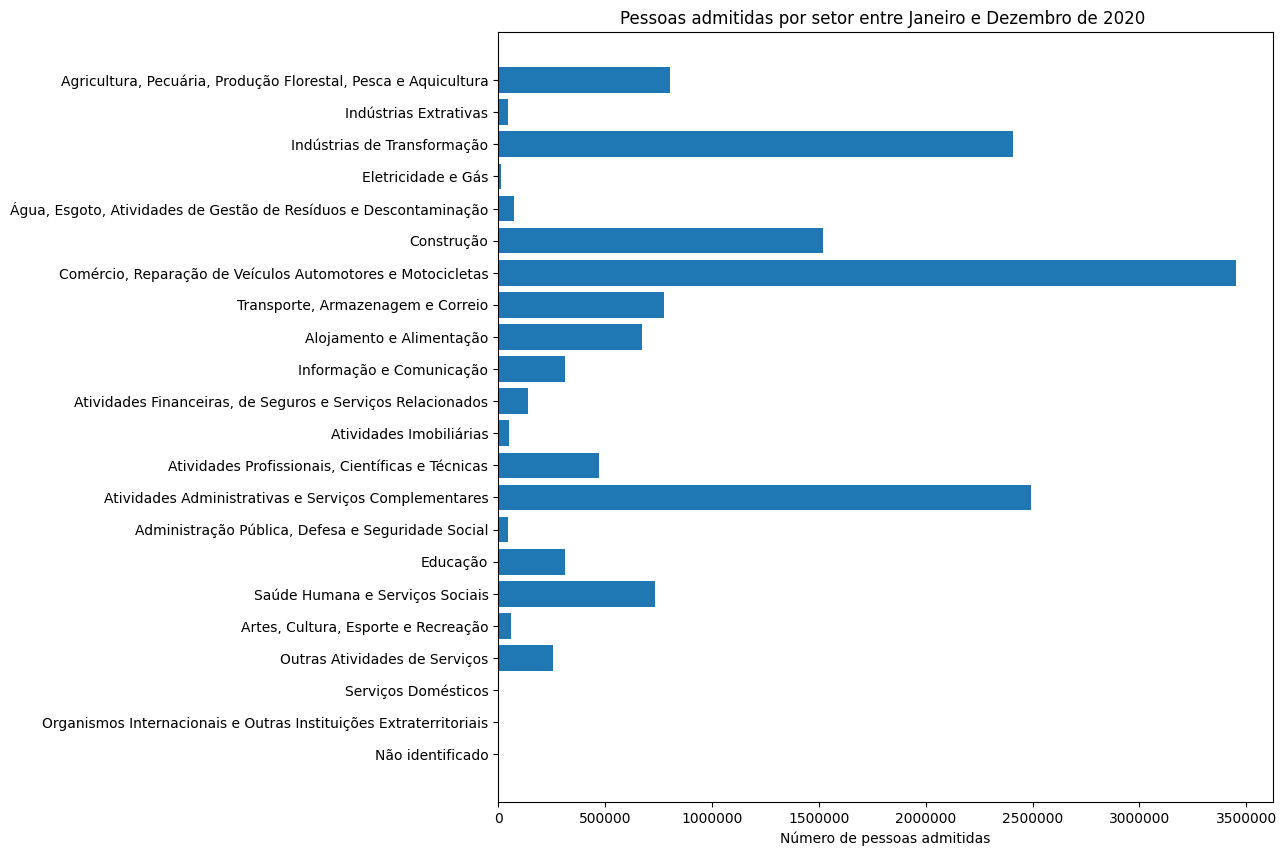

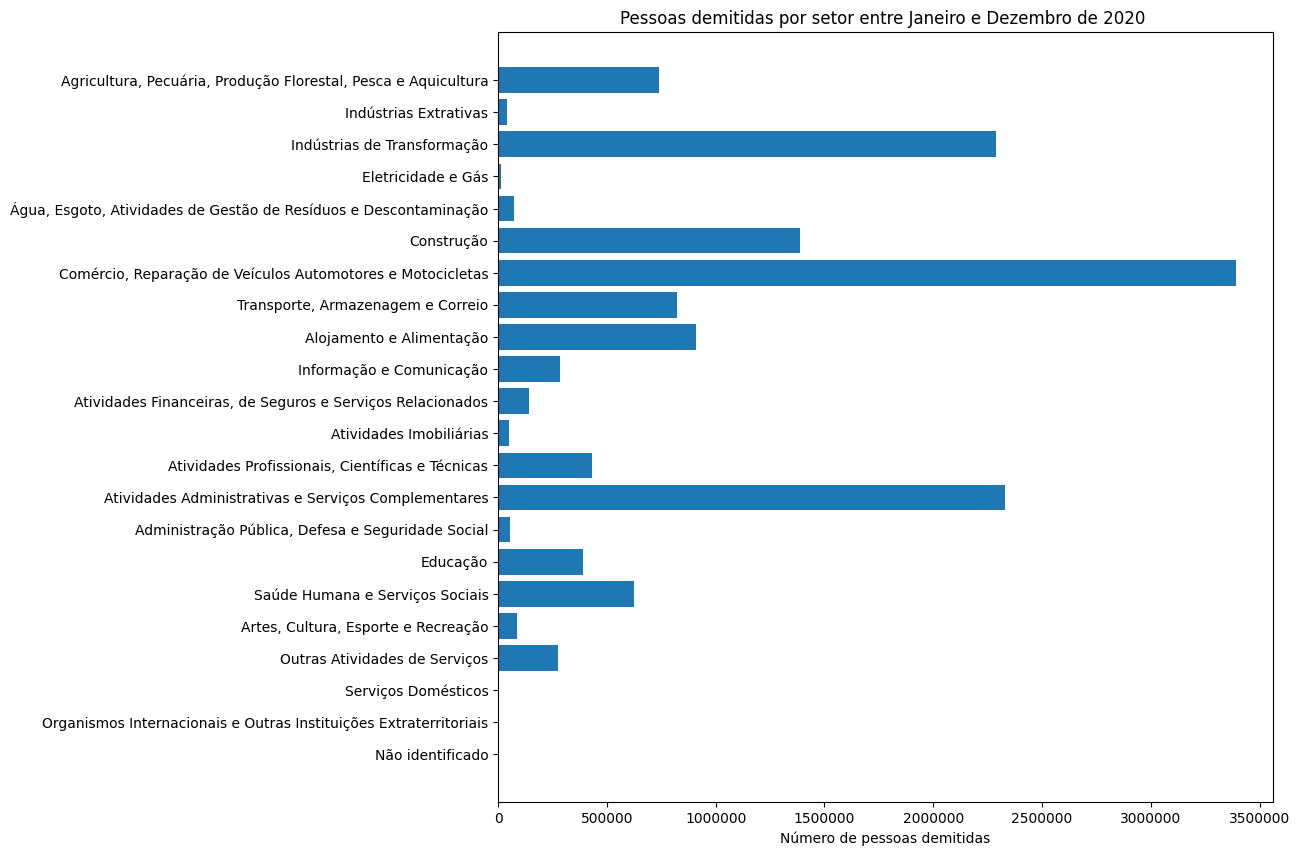

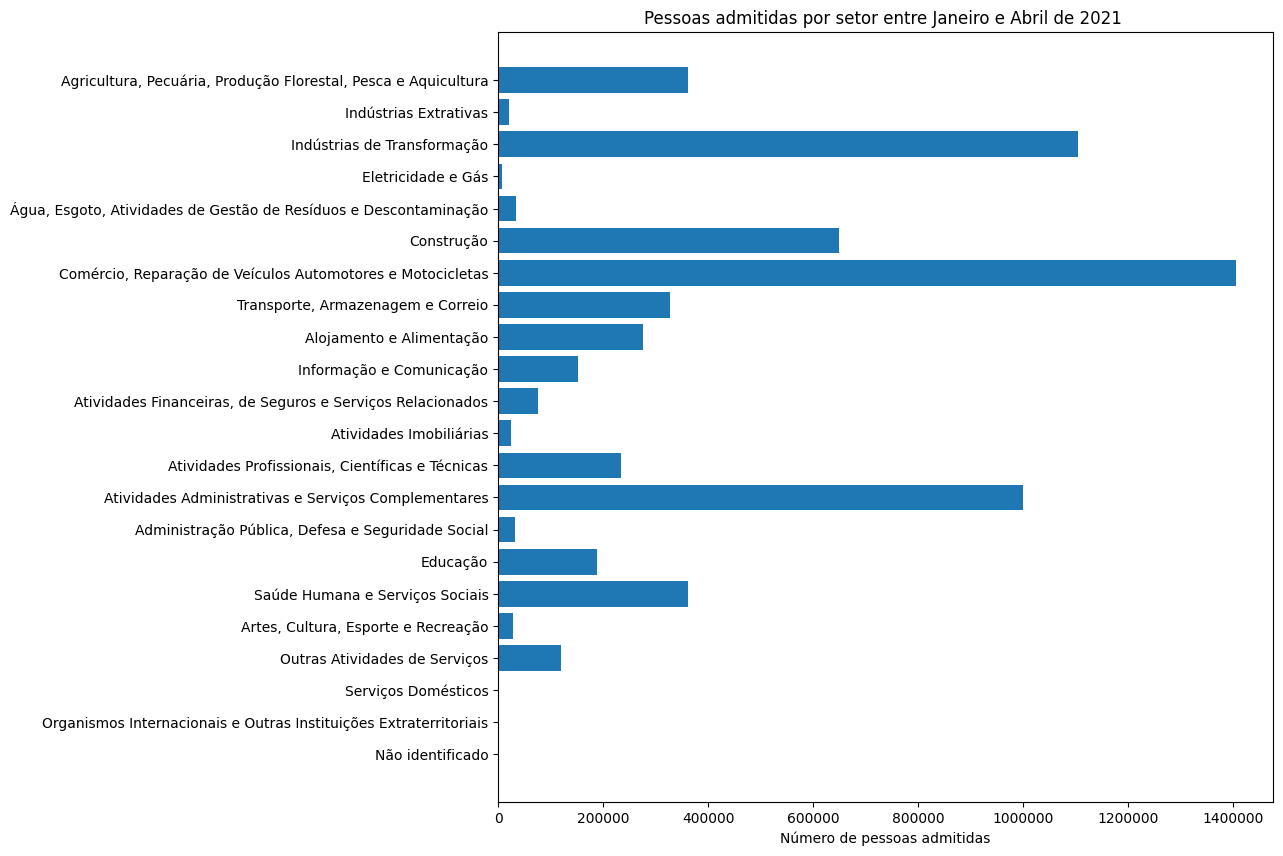

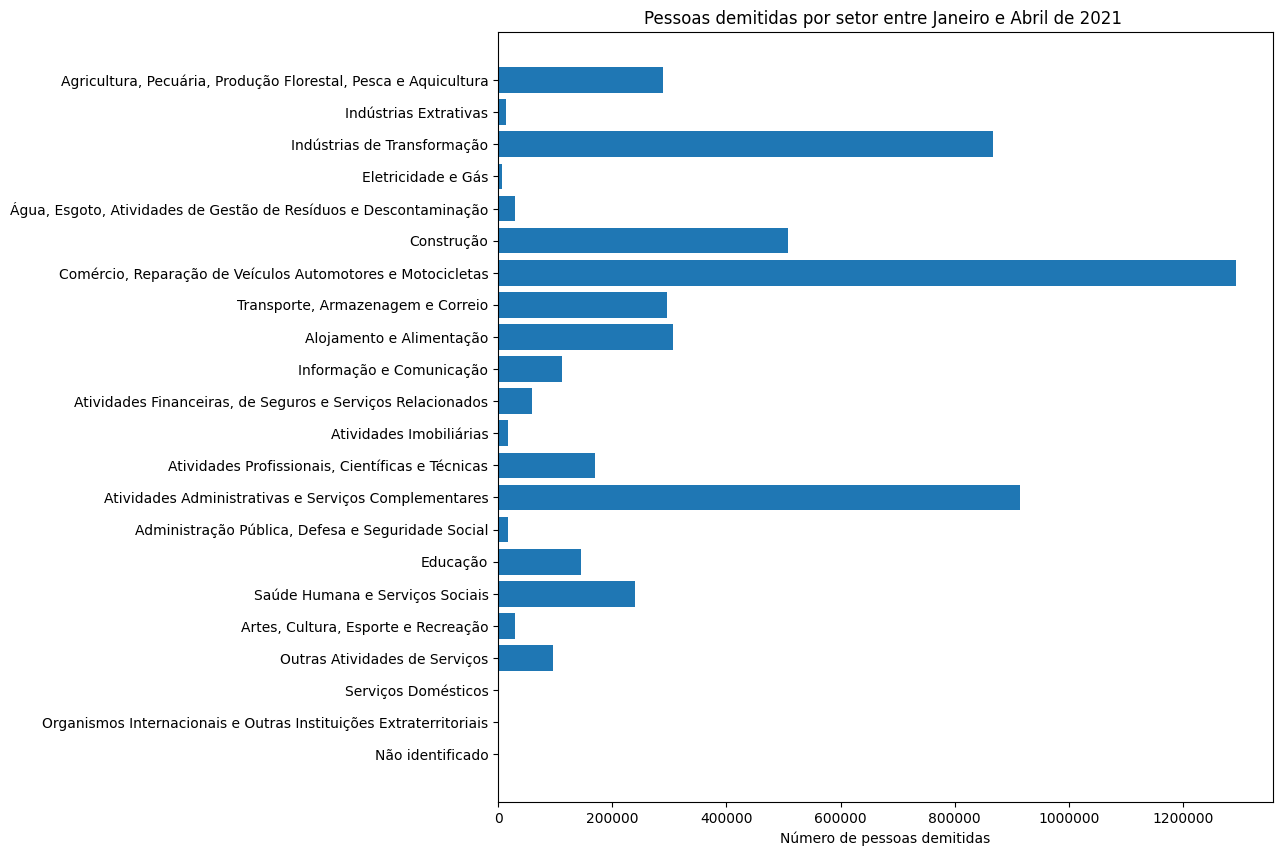

In [23]:
def plotGraficoSecao(lista,xlabel,title,tamanhox,tamanhoy,secoes):
    pessoas = {}
    for s in secoes:
        pessoas[s] = 0
    for l in lista:
        for secao,qtd_pessoas in l.items():
            pessoas[secao]+=qtd_pessoas
            
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(pessoas.keys()))
    grafico = []
    for secao,qtd_pessoas in pessoas.items():
        grafico.append(qtd_pessoas)
    ax.barh(y_pos,grafico, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pessoas.keys())
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()

pessoasAdmitidasSetor2020 = []
pessoasDemitidasSetor2020 = []

pessoasAdmitidasSetor2021 = []
pessoasDemitidasSetor2021 = []

for mes in movimento2020:
    pessoasAdmitidasSetor2020.append(movimento2020[mes].replace(sec_antigas, sec_novas).loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)]['seção'].value_counts().to_dict())
    pessoasDemitidasSetor2020.append(movimento2020[mes].replace(sec_antigas, sec_novas).loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)]['seção'].value_counts().to_dict())

for mes in movimento2021:
    pessoasAdmitidasSetor2021.append(movimento2021[mes].replace(sec_antigas, sec_novas).loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)]['seção'].value_counts().to_dict())
    pessoasDemitidasSetor2021.append(movimento2021[mes].replace(sec_antigas, sec_novas).loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)]['seção'].value_counts().to_dict())

plotGraficoSecao(pessoasAdmitidasSetor2020,'Número de pessoas admitidas','Pessoas admitidas por setor entre Janeiro e Dezembro de 2020 ',10,10,sec_novas)
plotGraficoSecao(pessoasDemitidasSetor2020,'Número de pessoas demitidas','Pessoas demitidas por setor entre Janeiro e Dezembro de 2020 ',10,10,sec_novas)
plotGraficoSecao(pessoasAdmitidasSetor2021,'Número de pessoas admitidas','Pessoas admitidas por setor entre Janeiro e Abril de 2021 ',10,10,sec_novas)
plotGraficoSecao(pessoasDemitidasSetor2021,'Número de pessoas demitidas','Pessoas demitidas por setor entre Janeiro e Abril de 2021 ',10,10,sec_novas)

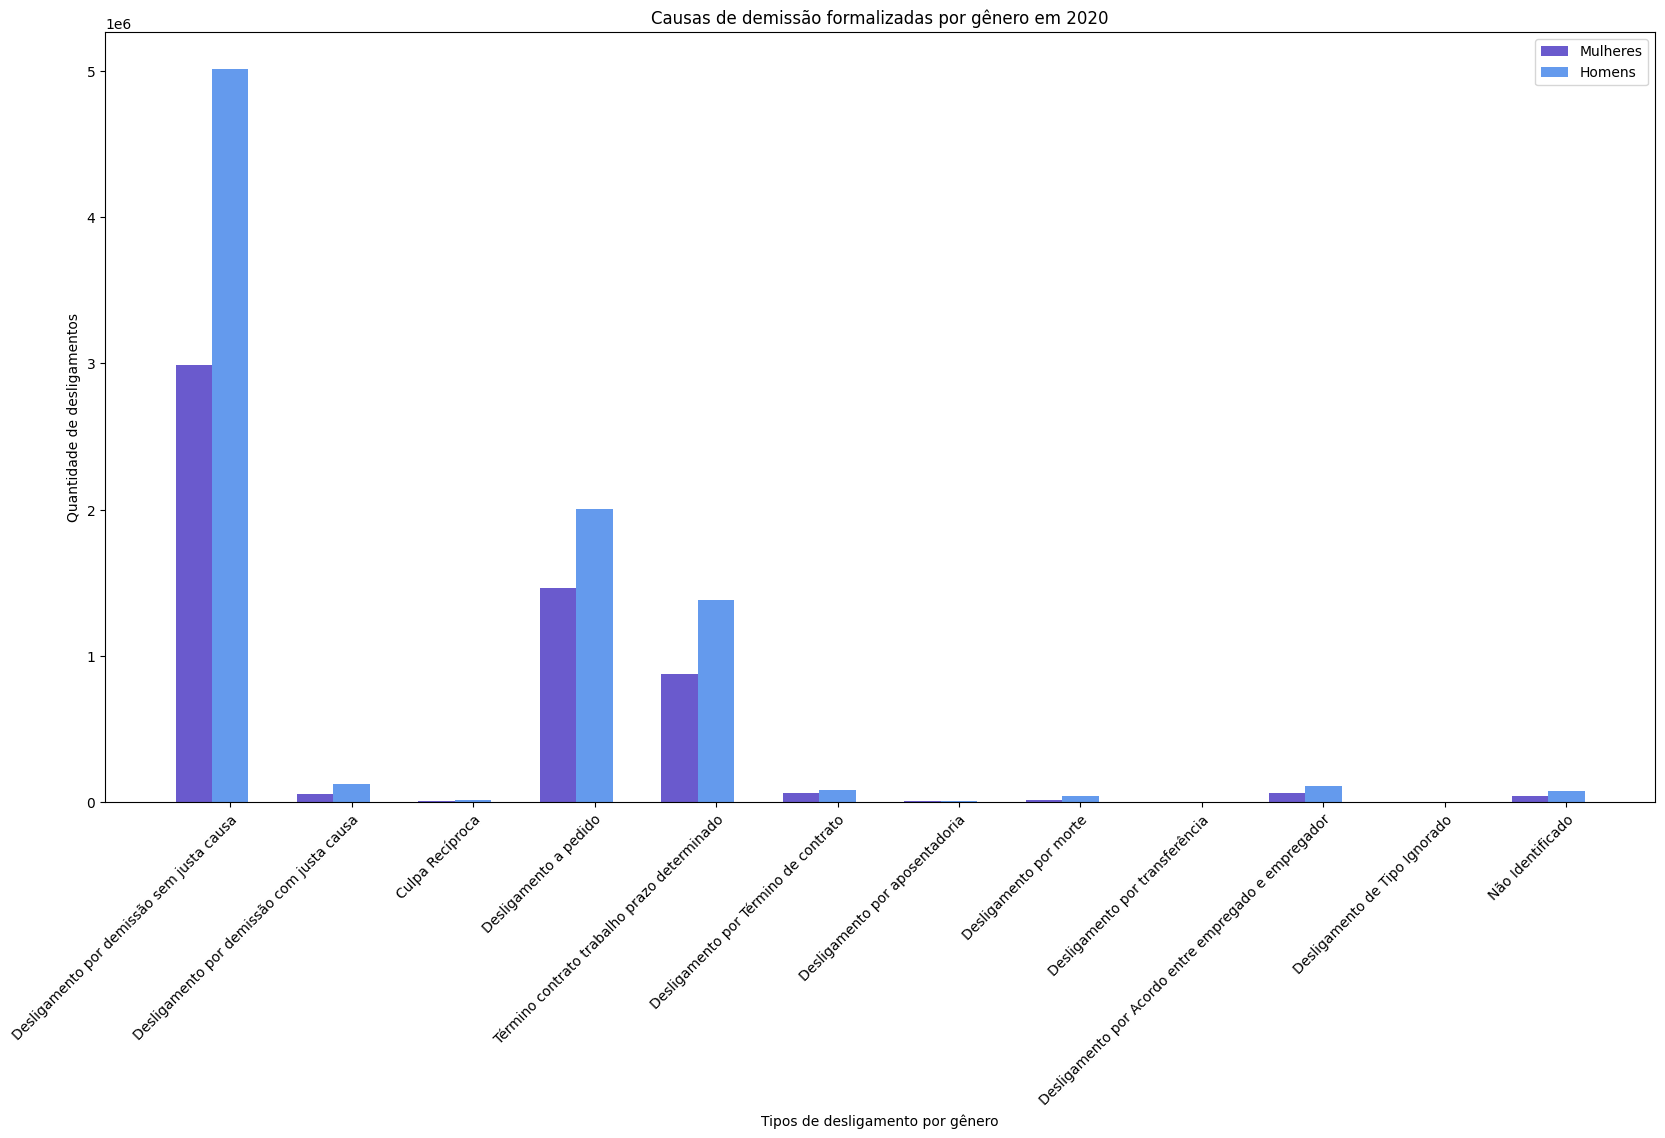

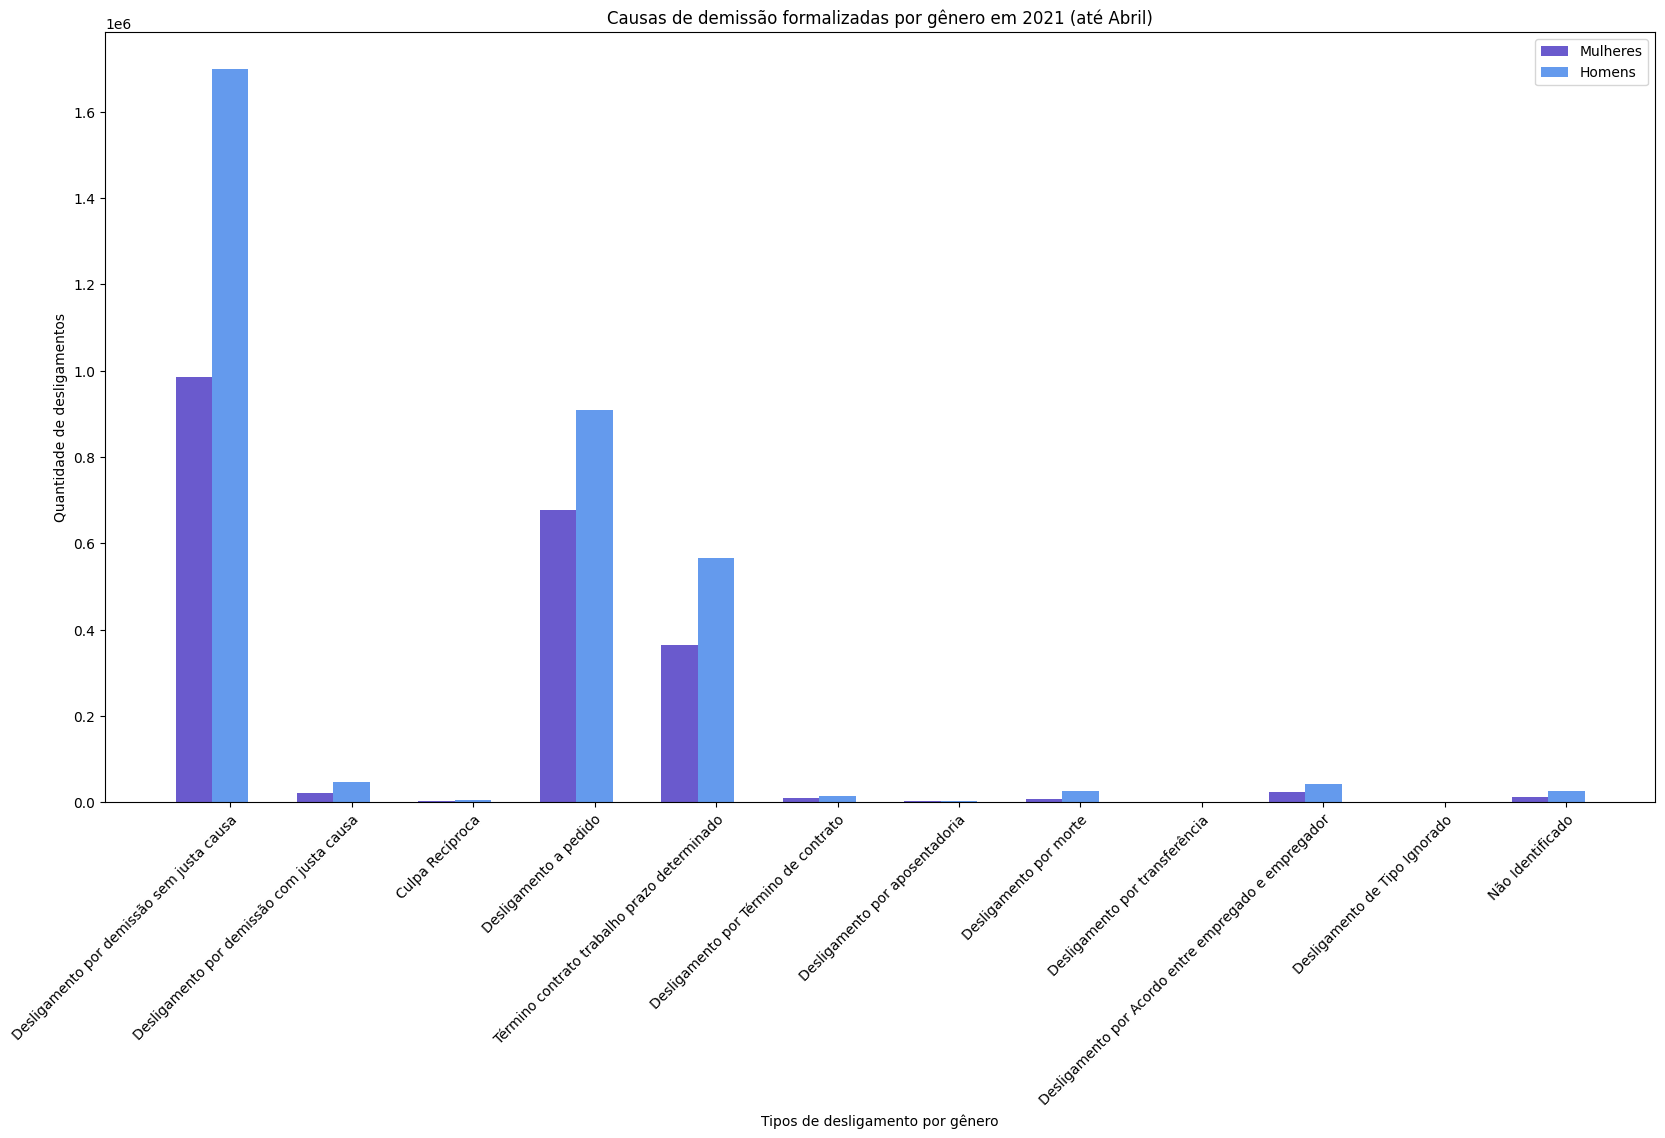

In [24]:
#Função para saber qual o tipo de desligamento da pessoa
cod_desligamentos = {31: "Desligamento por demissão sem justa causa",
                     32: "Desligamento por demissão com justa causa",
                     33: "Culpa Recíproca",
                     40: "Desligamento a pedido",
                     43: "Término contrato trabalho prazo determinado",
                     45: "Desligamento por Término de contrato",
                     50: "Desligamento por aposentadoria",
                     60: "Desligamento por morte",
                     80: "Desligamento por transferência",
                     90: "Desligamento por Acordo entre empregado e empregador",
                     98: "Desligamento de Tipo Ignorado",
                     99: "Não Identificado"}

def contagemDesligamentoSexo(dic):
    mes = {'Mulheres': {
                'Desligamento por demissão sem justa causa':0,
                'Desligamento por demissão com justa causa':0,
                'Culpa Recíproca':0,
                'Desligamento a pedido':0,
                'Término contrato trabalho prazo determinado':0,
                'Desligamento por Término de contrato':0,
                'Desligamento por aposentadoria':0,
                'Desligamento por morte':0,
                'Desligamento por transferência':0,
                'Desligamento por Acordo entre empregado e empregador':0,
                'Desligamento de Tipo Ignorado':0,
                'Não Identificado':0},
           'Homens': {
                'Desligamento por demissão sem justa causa':0,
                'Desligamento por demissão com justa causa':0,
                'Culpa Recíproca':0,
                'Desligamento a pedido':0,
                'Término contrato trabalho prazo determinado':0,
                'Desligamento por Término de contrato':0,
                'Desligamento por aposentadoria':0,
                'Desligamento por morte':0,
                'Desligamento por transferência':0,
                'Desligamento por Acordo entre empregado e empregador':0,
                'Desligamento de Tipo Ignorado':0,
                'Não Identificado':0}
            }
    
    for k, v in dic.items():
        if (k[0] in cod_desligamentos.keys()):
            tipodesligamento = cod_desligamentos[k[0]]
            if(k[1]==1):
                mes['Homens'][tipodesligamento] += v 
            if(k[1]==3):
                mes['Mulheres'][tipodesligamento] += v 
    
    return mes

desligamentosPorGenero2020 = {}
desligamentosPorGenero2021 = {}

for mes in movimento2020:
    desligamentosPorGenero2020[mes] = contagemDesligamentoSexo(movimento2020[mes].groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())

for mes in movimento2021:
    desligamentosPorGenero2021[mes] = contagemDesligamentoSexo(movimento2021[mes].groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())

def plotGraficoDesligamentoPorGenero(desligamentos,label_homens,label_mulheres,xlabel,ylabel,title,tamanhox,tamanhoy):
    barWidth = 0.3
    plt.figure(figsize=(tamanhox,tamanhoy))
    
    mulheres = {}
    homens = {}
    
    for mesesDesligamentos,conteudo in desligamentos.items():
        for tipoDesligamento,quantidade in conteudo['Mulheres'].items():
             mulheres[tipoDesligamento] = 0
            
        for tipoDesligamento,quantidade in conteudo['Homens'].items():
             homens[tipoDesligamento] = 0
                
    for mesesDesligamentos,conteudo in desligamentos.items():
        for tipoDesligamento,quantidade in conteudo['Mulheres'].items():
            mulheres[tipoDesligamento] += conteudo['Mulheres'][tipoDesligamento]
        
        for tipoDesligamento,quantidade in conteudo['Homens'].items():
            homens[tipoDesligamento] += conteudo['Homens'][tipoDesligamento]
    
    tipos = list(mulheres.keys())

    r1 = np.arange(len(tipos))
    r2 = [x + barWidth for x in r1]
    
    mulheresGrafico = []
    homensGrafico = []
    
    for tipoDesligamento,quantidade in mulheres.items():
        mulheresGrafico.append(quantidade)
    
    for tipoDesligamento,quantidade in homens.items():
        homensGrafico.append(quantidade)
    
    plt.bar(r1,mulheresGrafico,color='#6A5ACD',width=barWidth,label=label_mulheres)
    plt.bar(r2,homensGrafico,color='#649AED',width=barWidth,label=label_homens)
    plt.xlabel(xlabel)
    plt.xticks([r + barWidth for r in range(len(tipos))], tipos, rotation=45, ha='right', rotation_mode="anchor")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

plotGraficoDesligamentoPorGenero(desligamentosPorGenero2020, 'Homens', 'Mulheres', 'Tipos de desligamento por gênero', 'Quantidade de desligamentos', 'Causas de demissão formalizadas por gênero em 2020', 20, 10)
plotGraficoDesligamentoPorGenero(desligamentosPorGenero2021, 'Homens', 'Mulheres', 'Tipos de desligamento por gênero', 'Quantidade de desligamentos', 'Causas de demissão formalizadas por gênero em 2021 (até Abril)', 20, 10)

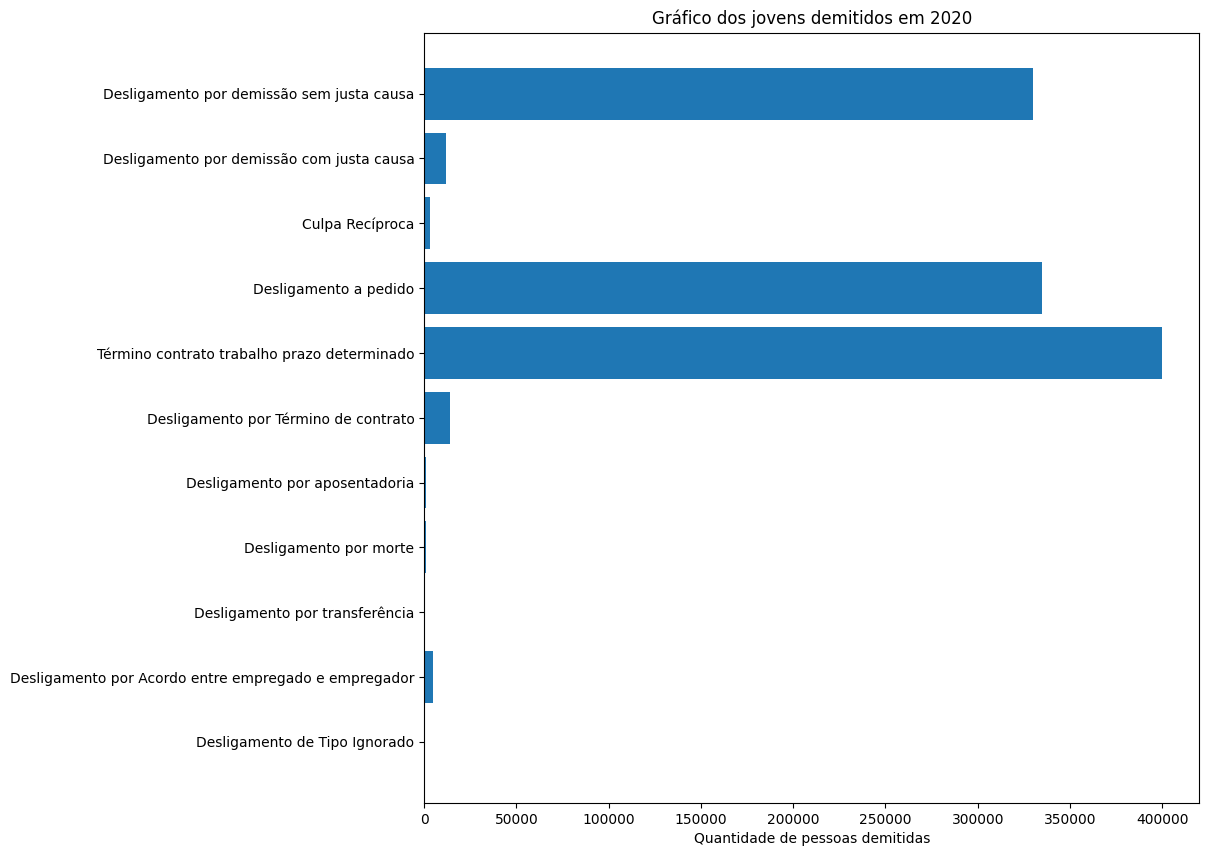

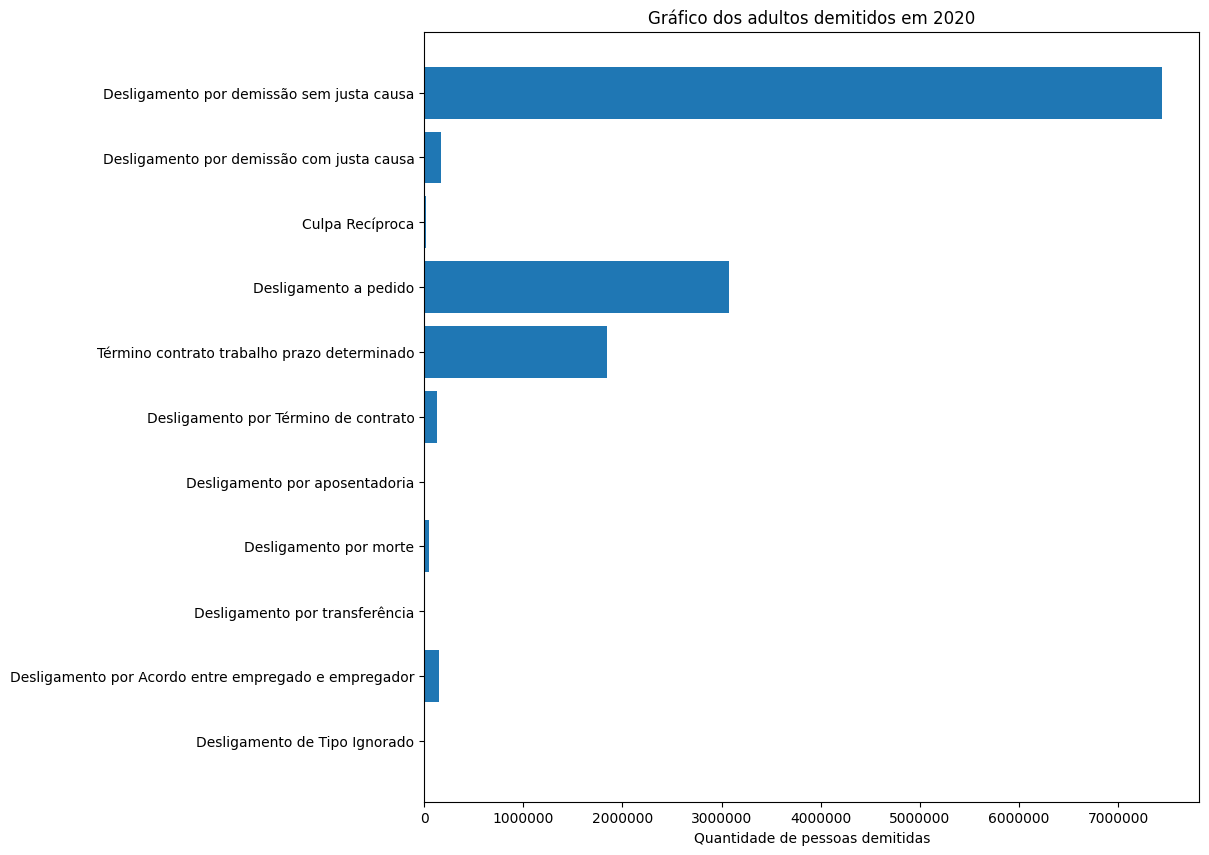

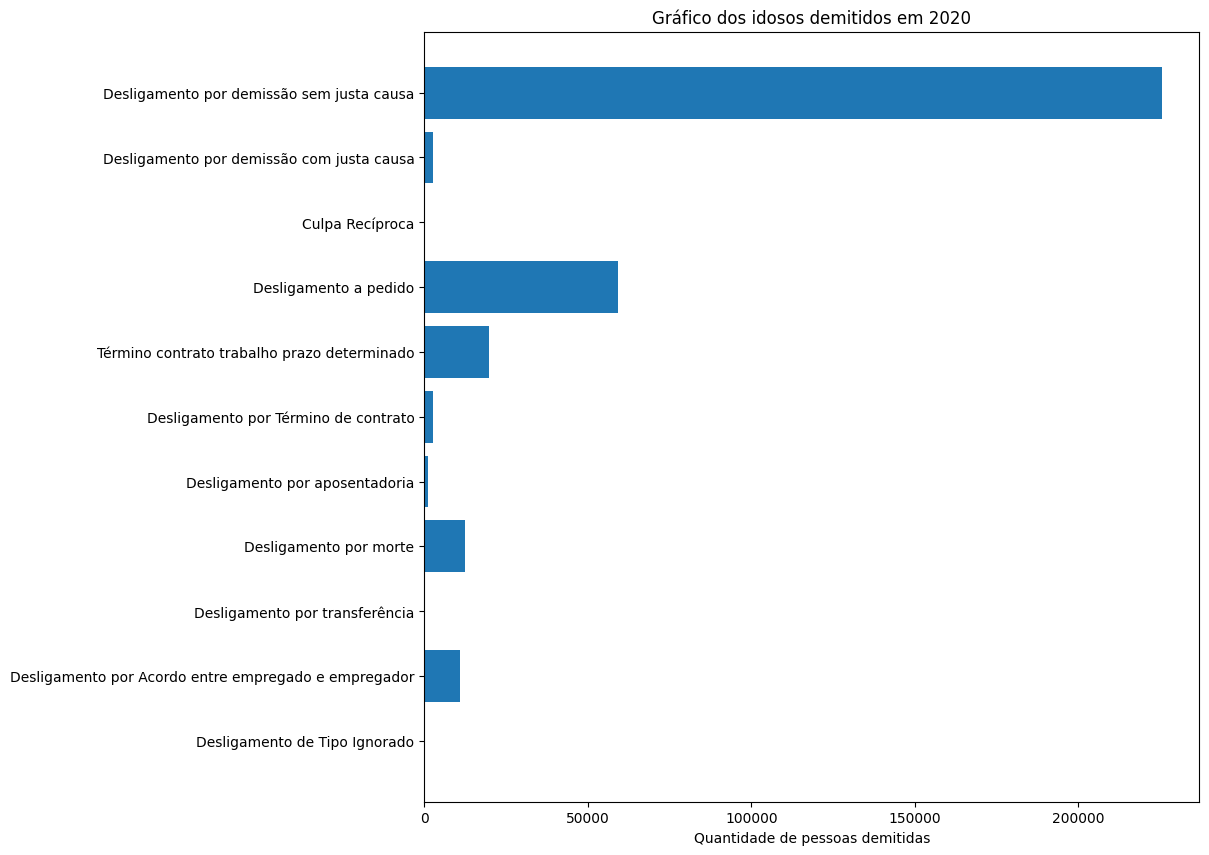

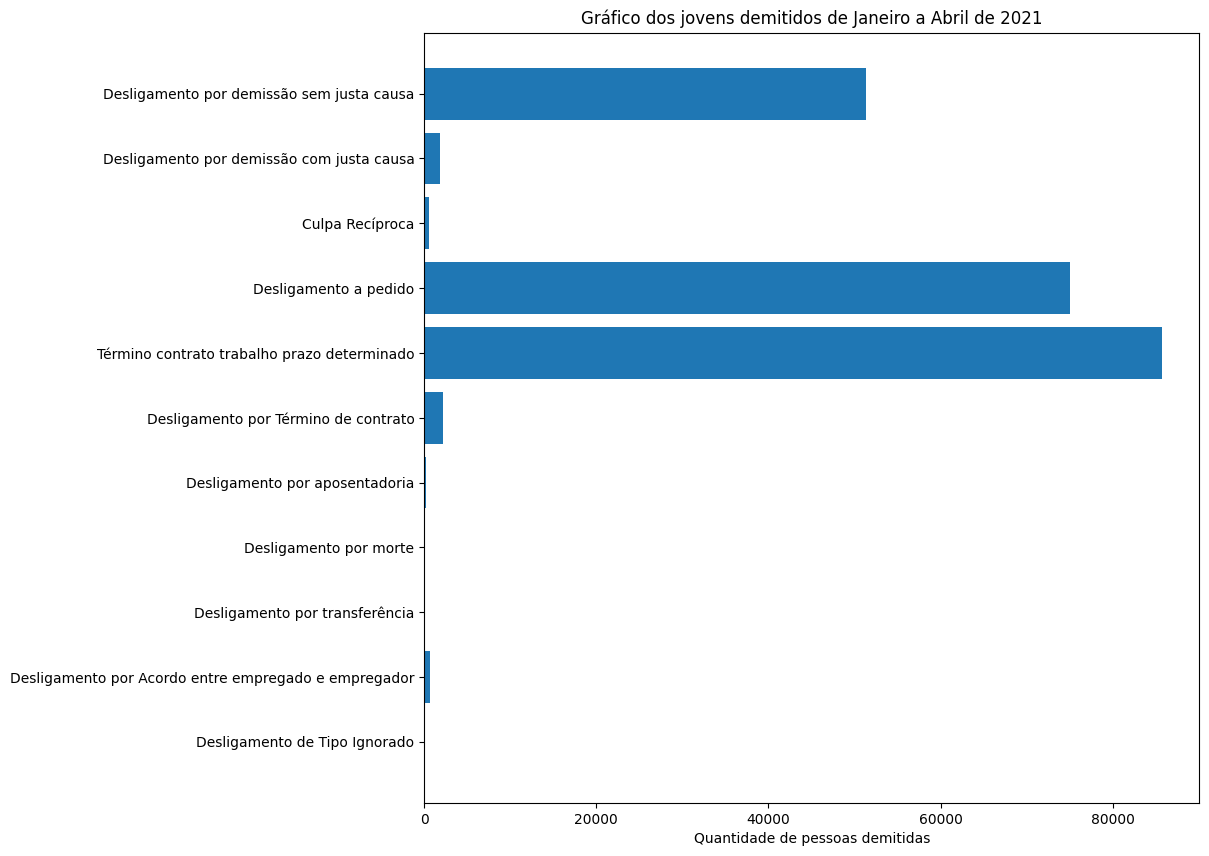

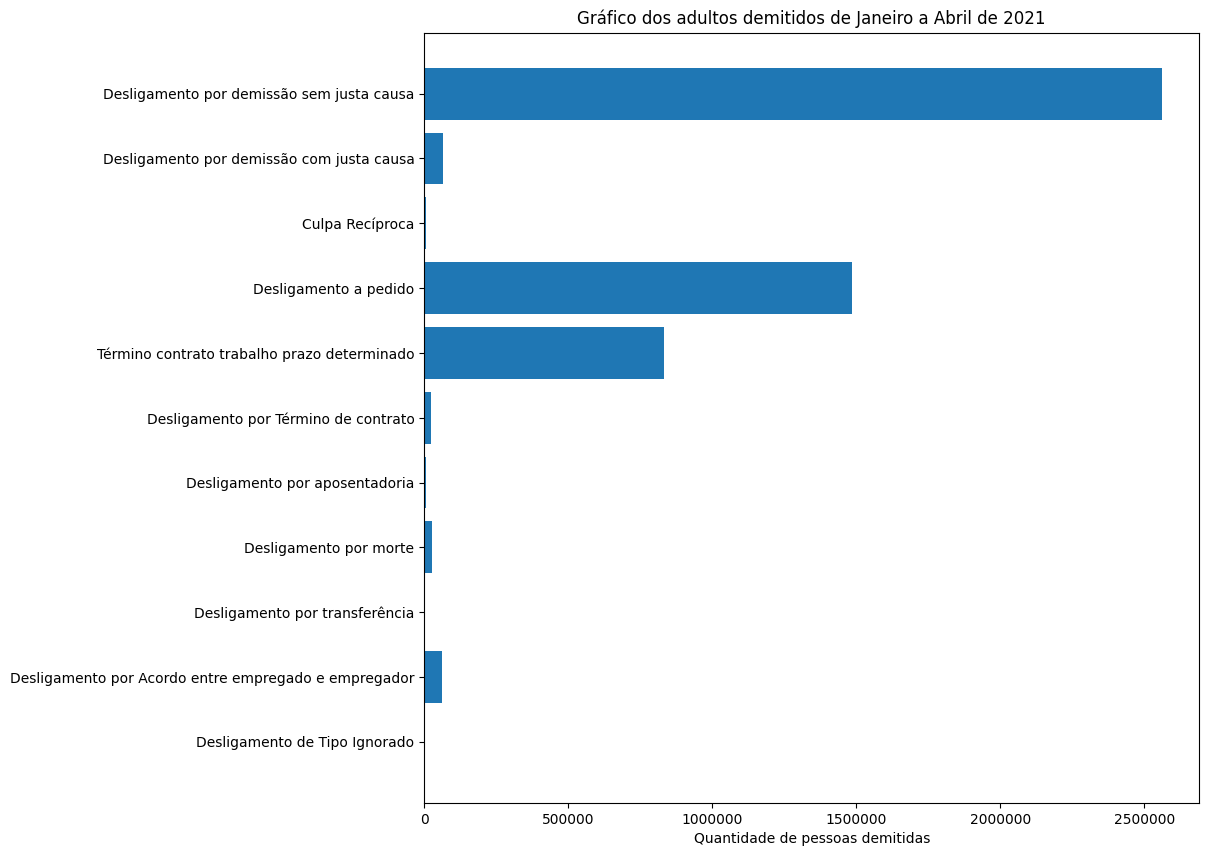

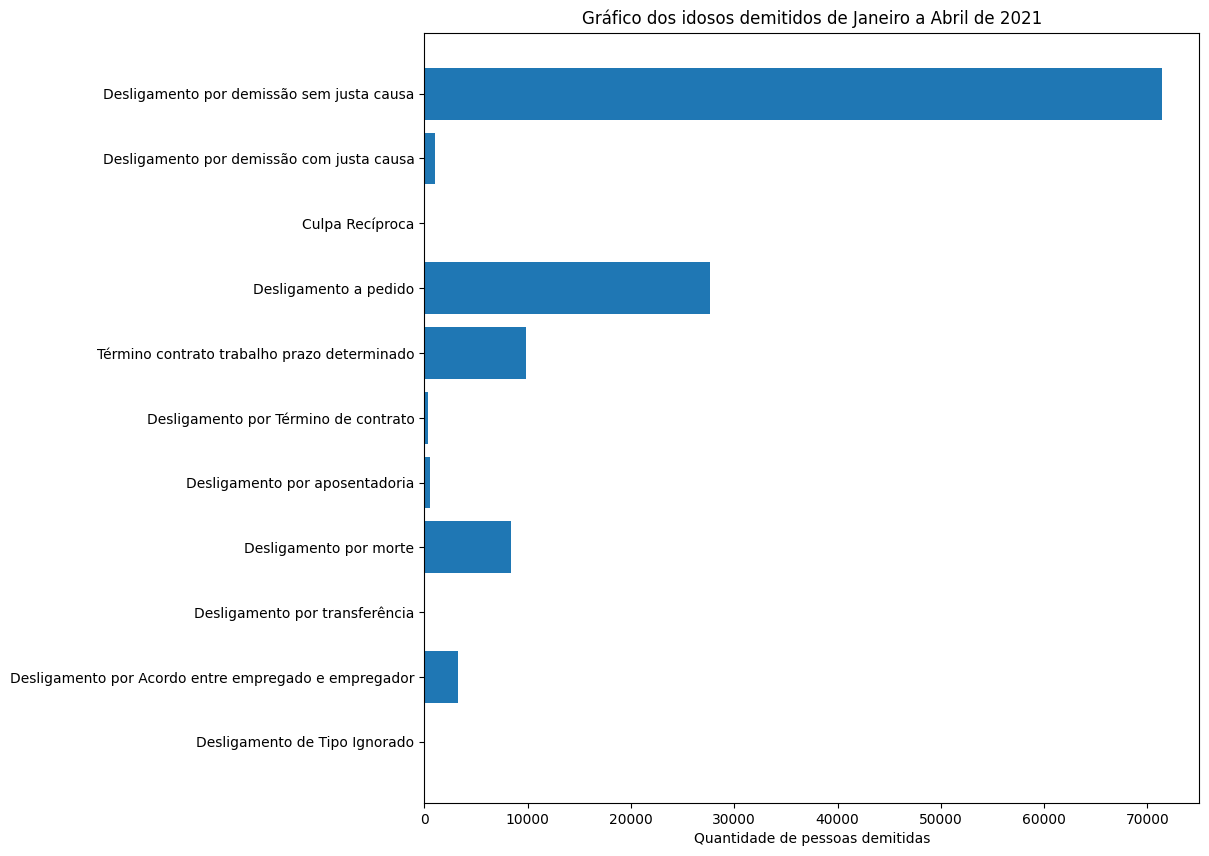

In [25]:
def contagemEmpregoIdadeDemissoes(lista):
    idades = {
        'Jovens':{},
        'Adultos':{},
        'Idosos':{}
    }
    for cod in cod_demitidos:
        idades['Jovens'][cod] = 0
        idades['Adultos'][cod] = 0
        idades['Idosos'][cod] = 0
    
    for dic in lista:
        tipoMovimentacao = dic['tipomovimentação']
        idade = dic['idade']
        if idade<=19:
            idades['Jovens'][tipoMovimentacao]+=1
        elif idade>=20 and idade<=59:
            idades['Adultos'][tipoMovimentacao]+=1
        elif idade>=60:
            idades['Idosos'][tipoMovimentacao]+=1
    return idades

def plotGraficoEmpregoIdade(idades,tipo,title,tamanhox,tamanhoy):
    demissoes_trad = {
        '31':'Desligamento por demissão sem justa causa',
        '32':'Desligamento por demissão com justa causa',
        '33':'Culpa Recíproca',
        '40':'Desligamento a pedido',
        '43':'Término contrato trabalho prazo determinado',
        '45':'Desligamento por Término de contrato',
        '50':'Desligamento por aposentadoria',
        '60':'Desligamento por morte',
        '80':'Desligamento por transferência',
        '90':'Desligamento por Acordo entre empregado e empregador',
        '98':'Desligamento de Tipo Ignorado'
    }
    
    demissoes = {
        'Desligamento por demissão sem justa causa':0,
        'Desligamento por demissão com justa causa':0,
        'Culpa Recíproca':0,
        'Desligamento a pedido':0,
        'Término contrato trabalho prazo determinado':0,
        'Desligamento por Término de contrato':0,
        'Desligamento por aposentadoria':0,
        'Desligamento por morte':0,
        'Desligamento por transferência':0,
        'Desligamento por Acordo entre empregado e empregador':0,
        'Desligamento de Tipo Ignorado':0
    }
    
    for mes,dic in idades.items():
        for cod,qtd in dic[tipo].items():
            movi = demissoes_trad[str(cod)]
            demissoes[movi] += qtd
   
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(demissoes.keys()))
    grafico = []
    for movimento,qtd in demissoes.items():
        grafico.append(qtd)
    ax.barh(y_pos,grafico, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(demissoes.keys())
    ax.invert_yaxis() 
    ax.set_xlabel('Quantidade de pessoas demitidas')
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    
demissoesEmpregoIdade2020 = {}
demissoesEmpregoIdade2021 = {}

for mes in movimento2020:
    demissoesEmpregoIdade2020[mes]=contagemEmpregoIdadeDemissoes(movimento2020[mes][['tipomovimentação','idade']].loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)].to_dict('records'))

for mes in movimento2021:
    demissoesEmpregoIdade2021[mes]=contagemEmpregoIdadeDemissoes(movimento2021[mes][['tipomovimentação','idade']].loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)].to_dict('records'))

plotGraficoEmpregoIdade(demissoesEmpregoIdade2020,'Jovens','Gráfico dos jovens demitidos em 2020',10,10)
plotGraficoEmpregoIdade(demissoesEmpregoIdade2020,'Adultos','Gráfico dos adultos demitidos em 2020',10,10)
plotGraficoEmpregoIdade(demissoesEmpregoIdade2020,'Idosos','Gráfico dos idosos demitidos em 2020',10,10)
plotGraficoEmpregoIdade(demissoesEmpregoIdade2021,'Jovens','Gráfico dos jovens demitidos de Janeiro a Abril de 2021',10,10)
plotGraficoEmpregoIdade(demissoesEmpregoIdade2021,'Adultos','Gráfico dos adultos demitidos de Janeiro a Abril de 2021',10,10)
plotGraficoEmpregoIdade(demissoesEmpregoIdade2021,'Idosos','Gráfico dos idosos demitidos de Janeiro a Abril de 2021',10,10)

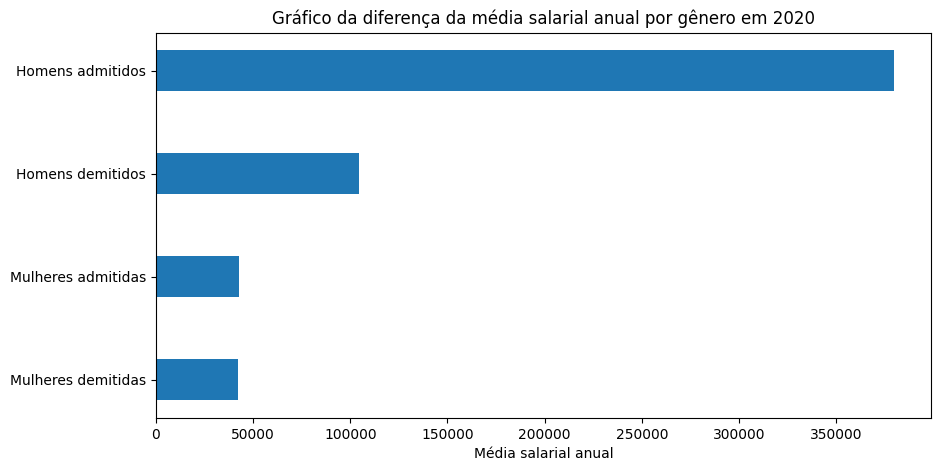

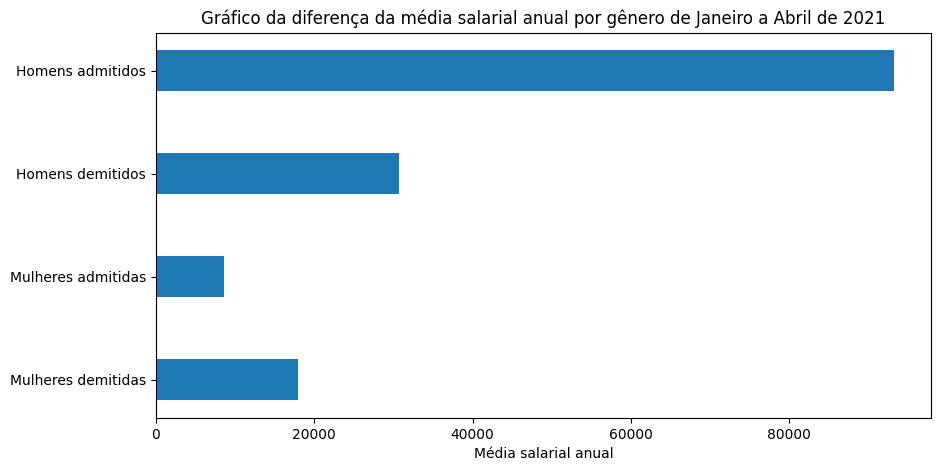

In [26]:
def plotGraficoDiferencaSalarialPorGenero(dic,tamanhox,tamanhoy,title,xlabel):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(dic.keys()))
    
    grafico = []
    for titulo,qtd in dic.items():
        grafico.append(qtd)
    ax.barh(y_pos,grafico,height=0.4, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(dic.keys())
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    
diferencaSalarialPorGenero2020 = {
    'Homens admitidos':0,
    'Homens demitidos':0,
    'Mulheres admitidas':0,
    'Mulheres demitidas':0
}

diferencaSalarialPorGenero2021 = {
    'Homens admitidos':0,
    'Homens demitidos':0,
    'Mulheres admitidas':0,
    'Mulheres demitidas':0
}

for mes in movimento2020:
    diferencaSalarialPorGenero2020['Homens admitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2020[mes]['sexo'].isin([1])]['salário'].mean()
    diferencaSalarialPorGenero2020['Mulheres admitidas']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2020[mes]['sexo'].isin([3])]['salário'].mean()
    diferencaSalarialPorGenero2020['Homens demitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2020[mes]['sexo'].isin([1])]['salário'].mean()
    diferencaSalarialPorGenero2020['Mulheres demitidas']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2020[mes]['sexo'].isin([3])]['salário'].mean()

for mes in movimento2021:
    diferencaSalarialPorGenero2021['Homens admitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2021[mes]['sexo'].isin([1])]['salário'].mean()
    diferencaSalarialPorGenero2021['Mulheres admitidas']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2021[mes]['sexo'].isin([3])]['salário'].mean()
    diferencaSalarialPorGenero2021['Homens demitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2021[mes]['sexo'].isin([1])]['salário'].mean()
    diferencaSalarialPorGenero2021['Mulheres demitidas']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2021[mes]['sexo'].isin([3])]['salário'].mean()

plotGraficoDiferencaSalarialPorGenero(diferencaSalarialPorGenero2020,10,5,"Gráfico da diferença da média salarial anual por gênero em 2020","Média salarial anual")
plotGraficoDiferencaSalarialPorGenero(diferencaSalarialPorGenero2021,10,5,"Gráfico da diferença da média salarial anual por gênero de Janeiro a Abril de 2021","Média salarial anual")

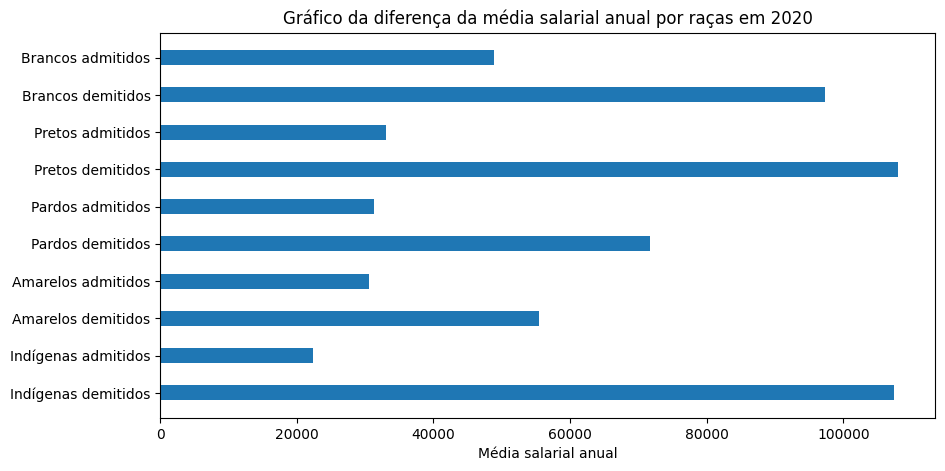

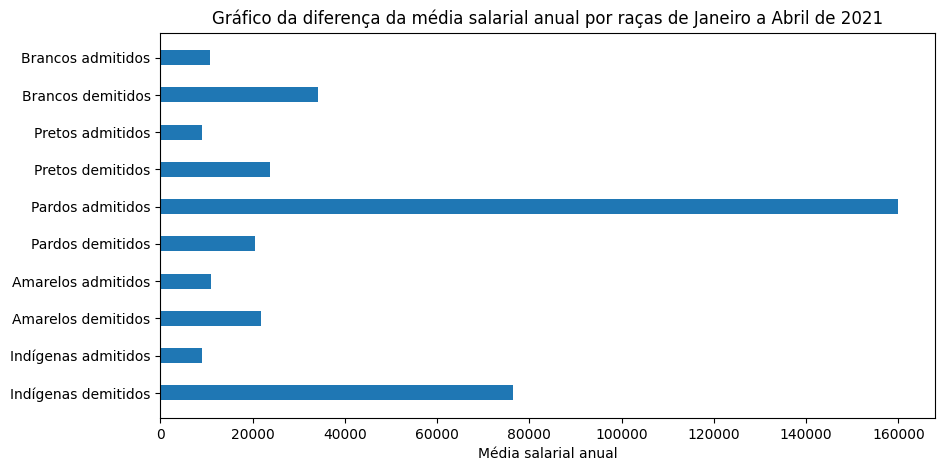

In [27]:
def plotGraficoDiferencaSalarialPorRaca(dic,tamanhox,tamanhoy,title,xlabel):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(dic.keys()))
    
    grafico = []
    for titulo,qtd in dic.items():
        grafico.append(qtd)
    
    ax.barh(y_pos,grafico,height=0.4, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(dic.keys())
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    
diferencaSalarialPorRaca2020 = {
    'Brancos admitidos':0,
    'Brancos demitidos':0,
    'Pretos admitidos':0,
    'Pretos demitidos':0,
    'Pardos admitidos':0,
    'Pardos demitidos':0,
    'Amarelos admitidos':0,
    'Amarelos demitidos':0,
    'Indígenas admitidos':0,
    'Indígenas demitidos':0
}

diferencaSalarialPorRaca2021 = {
    'Brancos admitidos':0,
    'Brancos demitidos':0,
    'Pretos admitidos':0,
    'Pretos demitidos':0,
    'Pardos admitidos':0,
    'Pardos demitidos':0,
    'Amarelos admitidos':0,
    'Amarelos demitidos':0,
    'Indígenas admitidos':0,
    'Indígenas demitidos':0
}

for mes in movimento2020:
    diferencaSalarialPorRaca2020['Brancos admitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2020[mes]['raçacor'].isin([1])]['salário'].mean()
    diferencaSalarialPorRaca2020['Pretos admitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2020[mes]['raçacor'].isin([2])]['salário'].mean()
    diferencaSalarialPorRaca2020['Pardos admitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2020[mes]['raçacor'].isin([3])]['salário'].mean()
    diferencaSalarialPorRaca2020['Amarelos admitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2020[mes]['raçacor'].isin([4])]['salário'].mean()
    diferencaSalarialPorRaca2020['Indígenas admitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2020[mes]['raçacor'].isin([5])]['salário'].mean()
    
    diferencaSalarialPorRaca2020['Brancos demitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2020[mes]['raçacor'].isin([1])]['salário'].mean()
    diferencaSalarialPorRaca2020['Pretos demitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2020[mes]['raçacor'].isin([2])]['salário'].mean()
    diferencaSalarialPorRaca2020['Pardos demitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2020[mes]['raçacor'].isin([3])]['salário'].mean()
    diferencaSalarialPorRaca2020['Amarelos demitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2020[mes]['raçacor'].isin([4])]['salário'].mean()
    diferencaSalarialPorRaca2020['Indígenas demitidos']+=movimento2020[mes].loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2020[mes]['raçacor'].isin([5])]['salário'].mean()

for mes in movimento2021:
    diferencaSalarialPorRaca2021['Brancos admitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2021[mes]['raçacor'].isin([1])]['salário'].mean()
    diferencaSalarialPorRaca2021['Pretos admitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2021[mes]['raçacor'].isin([2])]['salário'].mean()
    diferencaSalarialPorRaca2021['Pardos admitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2021[mes]['raçacor'].isin([3])]['salário'].mean()
    diferencaSalarialPorRaca2021['Amarelos admitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2021[mes]['raçacor'].isin([4])]['salário'].mean()
    diferencaSalarialPorRaca2021['Indígenas admitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)&movimento2021[mes]['raçacor'].isin([5])]['salário'].mean()
    
    diferencaSalarialPorRaca2021['Brancos demitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2021[mes]['raçacor'].isin([1])]['salário'].mean()
    diferencaSalarialPorRaca2021['Pretos demitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2021[mes]['raçacor'].isin([2])]['salário'].mean()
    diferencaSalarialPorRaca2021['Pardos demitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2021[mes]['raçacor'].isin([3])]['salário'].mean()
    diferencaSalarialPorRaca2021['Amarelos demitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2021[mes]['raçacor'].isin([4])]['salário'].mean()
    diferencaSalarialPorRaca2021['Indígenas demitidos']+=movimento2021[mes].loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)&movimento2021[mes]['raçacor'].isin([5])]['salário'].mean()

plotGraficoDiferencaSalarialPorRaca(diferencaSalarialPorRaca2020,10,5,"Gráfico da diferença da média salarial anual por raças em 2020","Média salarial anual")
plotGraficoDiferencaSalarialPorRaca(diferencaSalarialPorRaca2021,10,5,"Gráfico da diferença da média salarial anual por raças de Janeiro a Abril de 2021","Média salarial anual")